*  Data Preparation
*  Week 9 & 10
*  Nate Diaz-Santana

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup
import re

import requests
import urllib.request
import urllib.parse
import urllib.error
import json
import copy

import sqlite3

# Week 3 & 4: Project Milestone 2

In [4]:
# Expands the display of lists to see all values when running pandas commands
pd.set_option('display.max_rows', 10000) 

# Resets previous setting
#pd.reset_option('display.max_rows')

In [5]:
# data by year and month
mode_data = pd.read_csv("Average_Daily_Ridership_By_Mode-May27Update.csv")

# for some reason only gives data for fall seasons
bus_data = pd.read_csv("Bus_Ridership_by_Municipality-July23.csv")

In [6]:
# overview of dataset
mode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Calendar_Year            456 non-null    int64 
 1   Calendar_Month           456 non-null    int64 
 2   Mode                     456 non-null    object
 3   Average_Daily_Ridership  456 non-null    int64 
 4   Source                   456 non-null    object
 5   ObjectId                 456 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 21.5+ KB


In [7]:
# first few entries of dataset
mode_data.head()

,Calendar_Year,Calendar_Month,Mode,Average_Daily_Ridership,Source,ObjectId
0,2019,1,Bus,459160,APC,1
1,2019,1,CCT,4294,Revenue,2
2,2019,1,Heavy Rail,296709,Revenue,3
3,2019,1,Regional Rail,122856,Revenue,4
4,2019,1,Trackless Trolley,16853,APC,5


In [8]:
mode_data['Calendar_Year'].value_counts()

Calendar_Year
2019    72
2020    72
2021    72
2022    72
2023    72
2024    72
2025    24
Name: count, dtype: int64

In [9]:
# overview of dataset
bus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   County_Name        2961 non-null   object
 1   Municipality_Name  2961 non-null   object
 2   Mode               2961 non-null   object
 3   Season             2961 non-null   object
 4   Day_of_Week        2961 non-null   object
 5   On_                2961 non-null   int64 
 6   Off_               2961 non-null   int64 
 7   ObjectId           2961 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 185.2+ KB


In [10]:
# first few entries of dataset
bus_data.head()

,County_Name,Municipality_Name,Mode,Season,Day_of_Week,On_,Off_,ObjectId
0,Delaware County,EAST LANSDOWNE BOROUGH,Bus,Fall 2015,Weekday,369,315,1
1,Delaware County,EDDYSTONE BOROUGH,Bus,Fall 2015,Weekday,236,240,2
2,Delaware County,EDGMONT TOWNSHIP,Bus,Fall 2015,Weekday,63,76,3
3,Delaware County,FOLCROFT BOROUGH,Bus,Fall 2015,Weekday,223,217,4
4,Delaware County,GLENOLDEN BOROUGH,Bus,Fall 2015,Weekday,498,539,5


## Header/Column Renaming

Here, I'll be renaming the headers for the data sets to make them easier to work with, mostly just to shorten them, since I'll probably be typing them over and over again, while still preserving what they present in the header name. Such as 'Day_of_Week' to 'day_type' or 'Average_Daily_Ridership' to 'avg_daily_riders'. Anything not changed will probably be dropping later on, such as 'ObjectId' and 'Source'

In [13]:
# renames cols
mode_data.rename(columns={'Calendar_Year': 'year','Calendar_Month': 'month','Mode': 'trans_mode','Average_Daily_Ridership': 'avg_daily_riders'}, inplace=True)

In [14]:
# overview of dataset
mode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              456 non-null    int64 
 1   month             456 non-null    int64 
 2   trans_mode        456 non-null    object
 3   avg_daily_riders  456 non-null    int64 
 4   Source            456 non-null    object
 5   ObjectId          456 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 21.5+ KB


In [15]:
# renames cols
bus_data.rename(columns={'County_Name': 'county','Municipality_Name': 'muni','Mode': 'trans_mode','Season': 'season', 'Day_of_Week': 'day_type', 'On_': 'on', 'Off_': 'off'}, inplace=True)

In [16]:
# overview of dataset
bus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      2961 non-null   object
 1   muni        2961 non-null   object
 2   trans_mode  2961 non-null   object
 3   season      2961 non-null   object
 4   day_type    2961 non-null   object
 5   on          2961 non-null   int64 
 6   off         2961 non-null   int64 
 7   ObjectId    2961 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 185.2+ KB


## Dropping Unused Columns

Here, I'll be dropping certain columns I probably won't use, such as 'Source' and 'ObjectId' as to not have useless data around in my datasets.

In [19]:
# drops Source and ObjectId cols
mode_data = mode_data.drop(columns={'Source', 'ObjectId'})

# overview of dataset
mode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              456 non-null    int64 
 1   month             456 non-null    int64 
 2   trans_mode        456 non-null    object
 3   avg_daily_riders  456 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 14.4+ KB


In [20]:
# drops ObjectId col
bus_data = bus_data.drop(columns={'ObjectId'})

# overview of dataset
bus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      2961 non-null   object
 1   muni        2961 non-null   object
 2   trans_mode  2961 non-null   object
 3   season      2961 non-null   object
 4   day_type    2961 non-null   object
 5   on          2961 non-null   int64 
 6   off         2961 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 162.1+ KB


## Data Formatting

Here, I'll be checking the formats of our data to see if anything needs fixing.

From the results of both, we can see that there is no spelling error or abnormalities in the categorical data columns so things like fuzzy matching will probably not be necessary.

### Mode Data

For the mode data, I will actually be changing the formatting for the transporation mode by removing spaces and making everything lowercase to eliminate things such as double spacing or different capitalization from affecting grouping.

In [26]:
# first few entries of dataset
mode_data.head()

,year,month,trans_mode,avg_daily_riders
0,2019,1,Bus,459160
1,2019,1,CCT,4294
2,2019,1,Heavy Rail,296709
3,2019,1,Regional Rail,122856
4,2019,1,Trackless Trolley,16853


In [27]:
# makes column entries lowercase and replaces spaces with nothing, removes them
mode_data['trans_mode'] = mode_data['trans_mode'].str.lower().str.replace(' ', '')

In [28]:
# gets count of each unique value in column
mode_data['trans_mode'].value_counts()

trans_mode
bus                 76
cct                 76
heavyrail           76
regionalrail        76
tracklesstrolley    76
trolley             76
Name: count, dtype: int64

### Bus Data

For the bus data, I will be doing something similar to the other dataset, where I change everything to lowercase and remove spacing to avoid issues with capitalization and spacing. For this dataset, I will only be doing it on county, municipality, trans_mode, and day_type, as I will eventually split season into 2 columns using the space between the season and year to do so.

In [31]:
# first few entries of dataset
bus_data.head()

,county,muni,trans_mode,season,day_type,on,off
0,Delaware County,EAST LANSDOWNE BOROUGH,Bus,Fall 2015,Weekday,369,315
1,Delaware County,EDDYSTONE BOROUGH,Bus,Fall 2015,Weekday,236,240
2,Delaware County,EDGMONT TOWNSHIP,Bus,Fall 2015,Weekday,63,76
3,Delaware County,FOLCROFT BOROUGH,Bus,Fall 2015,Weekday,223,217
4,Delaware County,GLENOLDEN BOROUGH,Bus,Fall 2015,Weekday,498,539


In [32]:
# makes columns' entries lowercase and replaces spaces with nothing, removes them
bus_data['county'] = bus_data['county'].str.lower().str.replace(' ', '')
bus_data['muni'] = bus_data['muni'].str.lower().str.replace(' ', '')
bus_data['trans_mode'] = bus_data['trans_mode'].str.lower().str.replace(' ', '')
bus_data['day_type'] = bus_data['day_type'].str.lower().str.replace(' ', '')

# makes column entries lowercase only
bus_data['season'] = bus_data['season'].str.lower()

In [33]:
# gets count of each unique value in column
bus_data['county'].value_counts()

county
delawarecounty        966
montgomerycounty      945
buckscounty           525
chestercounty         462
mercercounty           21
newcastlecounty        21
philadelphiacounty     21
Name: count, dtype: int64

In [34]:
# gets count of each unique value in column
bus_data['muni'].value_counts()

muni
telfordborough              42
newtowntownship             42
upperprovidencetownship     42
springfieldtownship         42
thornburytownship           42
middletowntownship          42
willistowntownship          21
westgoshentownship          21
westwhitelandtownship       21
westtowntownship            21
aldanborough                21
uwchlantownship             21
astontownship               21
brookhavenborough           21
chaddsfordtownship          21
chestercity                 21
chesterheightsborough       21
chestertownship             21
westchesterborough          21
springcityborough           21
tredyffrintownship          21
eastgoshentownship          21
westrockhilltownship        21
calntownship                21
charlestowntownship         21
coatesvillecity             21
downingtownborough          21
eastcalntownship            21
eastpikelandtownship        21
collingdaleborough          21
eastvincenttownship         21
eastwhitelandtownship       21
eas

In [35]:
# gets count of each unique value in column
bus_data['trans_mode'].value_counts()

trans_mode
bus    2961
Name: count, dtype: int64

In [36]:
# gets count of each unique value in column
bus_data['day_type'].value_counts()

day_type
weekday     1269
saturday     846
sunday       846
Name: count, dtype: int64

In [37]:
# gets count of each unique value in column
bus_data['season'].value_counts()

season
fall 2017    423
fall 2018    423
fall 2019    423
fall 2021    423
fall 2022    423
fall 2023    423
fall 2015    141
fall 2014    141
fall 2016    141
Name: count, dtype: int64

## New Feature Columns

Here, I will look through the data and add some features that I think might be useful for using the data in a model, things such as splitting the season column for the bus data into season and year columns for easier data access to either.

### Mode Data

For the mode data, I will add a column that states the season the month fall under, for easier data comparison with both the bus data set, and the 2 other datasets that I will be using for this project in the future.

In [42]:
# first few entries of dataset
mode_data.head()

,year,month,trans_mode,avg_daily_riders
0,2019,1,bus,459160
1,2019,1,cct,4294
2,2019,1,heavyrail,296709
3,2019,1,regionalrail,122856
4,2019,1,tracklesstrolley,16853


In [43]:
# septa spring schedule usually starts end of feb.
# septa summer schedule usually starts mid june.
# septa fall schedule usually starts end of aug.
# septa winter schedule usually starts mid dec.

#schedule for project
#spring march - may
#summer june - aug
#fall sept - nov
#winter dec - feb (next year)

# function that assigns a season based on the month number according to a generalization of the septa seasonal schedule start dates/months above.
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    elif month in [12, 1, 2]:
        return 'winter'

In [44]:
# applies above function to season column and creates a new column for season
mode_data['season'] = mode_data['month'].apply(get_season)

In [45]:
# pops season column and re-inserts it after the month column
mode_data.insert(2, 'season', mode_data.pop('season'))

In [46]:
mode_data.head()

,year,month,season,trans_mode,avg_daily_riders
0,2019,1,winter,bus,459160
1,2019,1,winter,cct,4294
2,2019,1,winter,heavyrail,296709
3,2019,1,winter,regionalrail,122856
4,2019,1,winter,tracklesstrolley,16853


In [47]:
# gets count of each unique value in column
mode_data['season'].value_counts()

season
winter    120
spring    120
summer    108
fall      108
Name: count, dtype: int64

### Bus Data

For the bus data, I will split the season column into a season and year column to have easier access to both sets of data.

In [50]:
# first few entries of dataset
bus_data.head()

,county,muni,trans_mode,season,day_type,on,off
0,delawarecounty,eastlansdowneborough,bus,fall 2015,weekday,369,315
1,delawarecounty,eddystoneborough,bus,fall 2015,weekday,236,240
2,delawarecounty,edgmonttownship,bus,fall 2015,weekday,63,76
3,delawarecounty,folcroftborough,bus,fall 2015,weekday,223,217
4,delawarecounty,glenoldenborough,bus,fall 2015,weekday,498,539


In [51]:
# splits season column into season and year based on the space between the two in the season column
bus_data[['season', 'year']] = bus_data['season'].str.split(' ', expand=True)

In [52]:
# pops year column and re-inserts it after the season column
bus_data.insert(4, 'year', bus_data.pop('year'))

In [53]:
# first few entries of dataset
bus_data.head()

,county,muni,trans_mode,season,year,day_type,on,off
0,delawarecounty,eastlansdowneborough,bus,fall,2015,weekday,369,315
1,delawarecounty,eddystoneborough,bus,fall,2015,weekday,236,240
2,delawarecounty,edgmonttownship,bus,fall,2015,weekday,63,76
3,delawarecounty,folcroftborough,bus,fall,2015,weekday,223,217
4,delawarecounty,glenoldenborough,bus,fall,2015,weekday,498,539


## Data Views

Here, I'm just visualizing some of the data to view outliers, I have chosen not to remove them as I think fluctuations in ridership can be affected by weather patterns and events such as concerts or sports games and such, and since I'm comparing these to weather patterns and unemployment rates, I have chosen to keep the outliers for ridership, for now.

### Mode Data

Here, we see the histogram of the average daily ridership, which shows a right-skew, probably due to some methods of transportation having lower capacity or lower ridership in general.

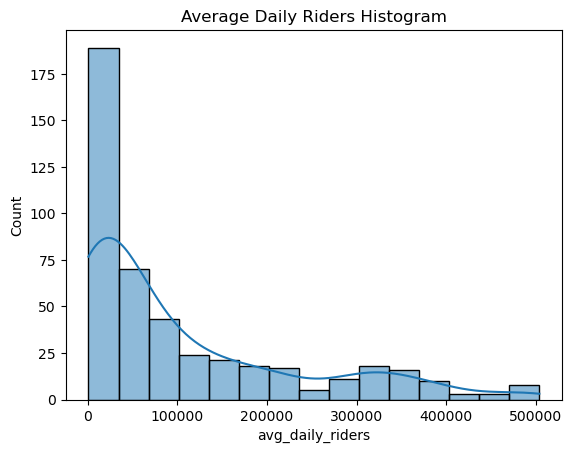

In [58]:
sb.histplot(data=mode_data, x='avg_daily_riders', kde=True)
plt.title("Average Daily Riders Histogram")
plt.show()

Here, we see the boxplot for average daily ridership and seasons which shows that all seasons do have a few outliers

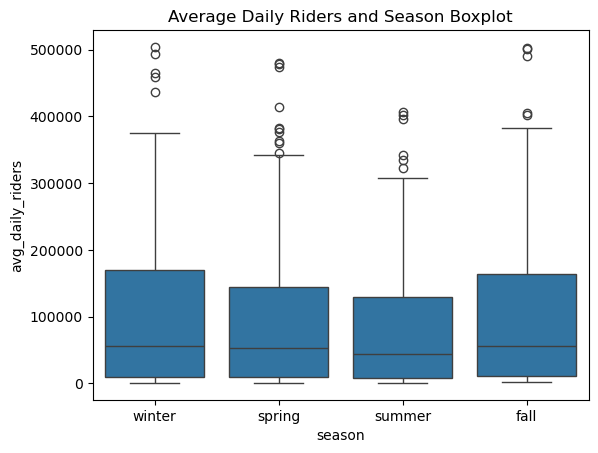

In [60]:
sb.boxplot(data=mode_data, x='season', y='avg_daily_riders')
plt.title("Average Daily Riders and Season Boxplot")
plt.show()

Here, we see the boxplot for average daily ridership and years which shows that only a 4 years have outliers while 3 of them don't.

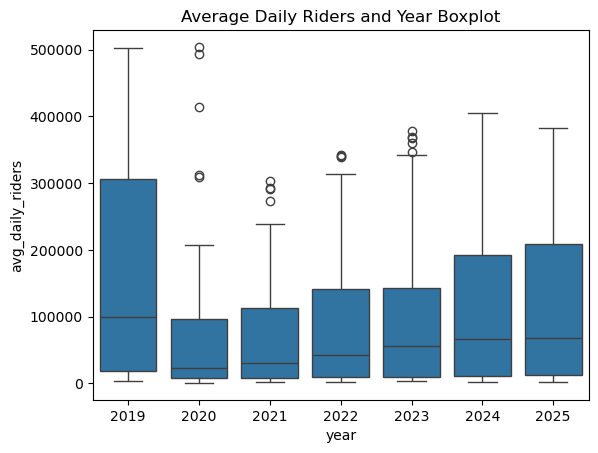

In [62]:
sb.boxplot(data=mode_data, x='year', y='avg_daily_riders')
plt.title("Average Daily Riders and Year Boxplot")
plt.show()

Here, we see the boxplot for average daily ridership and month which shows that all months do have a few outliers.

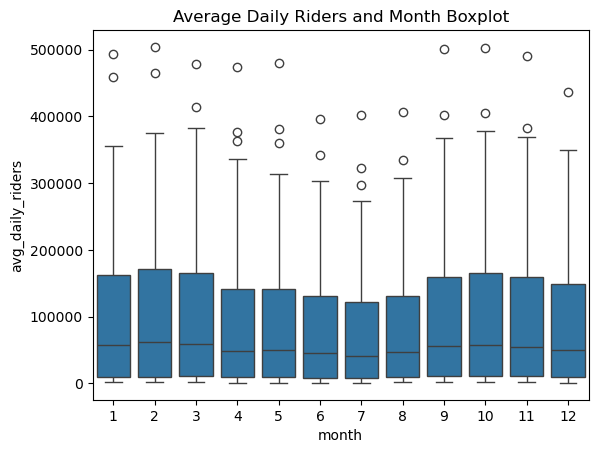

In [64]:
sb.boxplot(data=mode_data, x='month', y='avg_daily_riders')
plt.title("Average Daily Riders and Month Boxplot")
plt.show()

Here, we see the boxplot for average daily ridership and transportation mode which shows that only 2 modes have a few outliers, those being the ones with the least ridership.

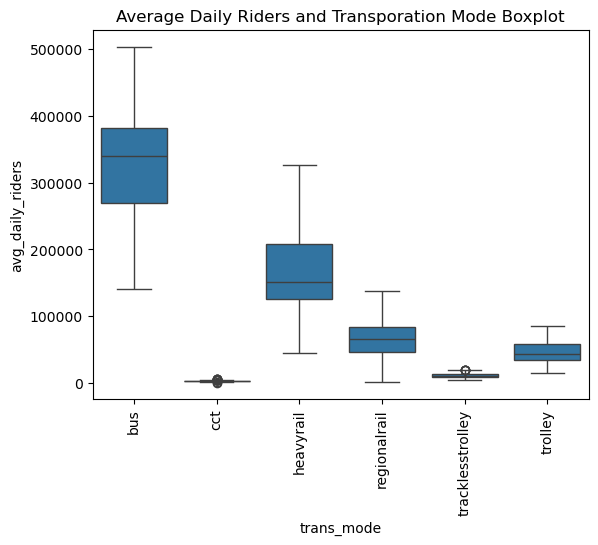

In [66]:
sb.boxplot(data=mode_data, x='trans_mode', y='avg_daily_riders')
plt.title("Average Daily Riders and Transporation Mode Boxplot")
plt.xticks(rotation=90)
plt.show()

### Bus Data

Here, we have the two histograms for people getting on and people getting off the bus.

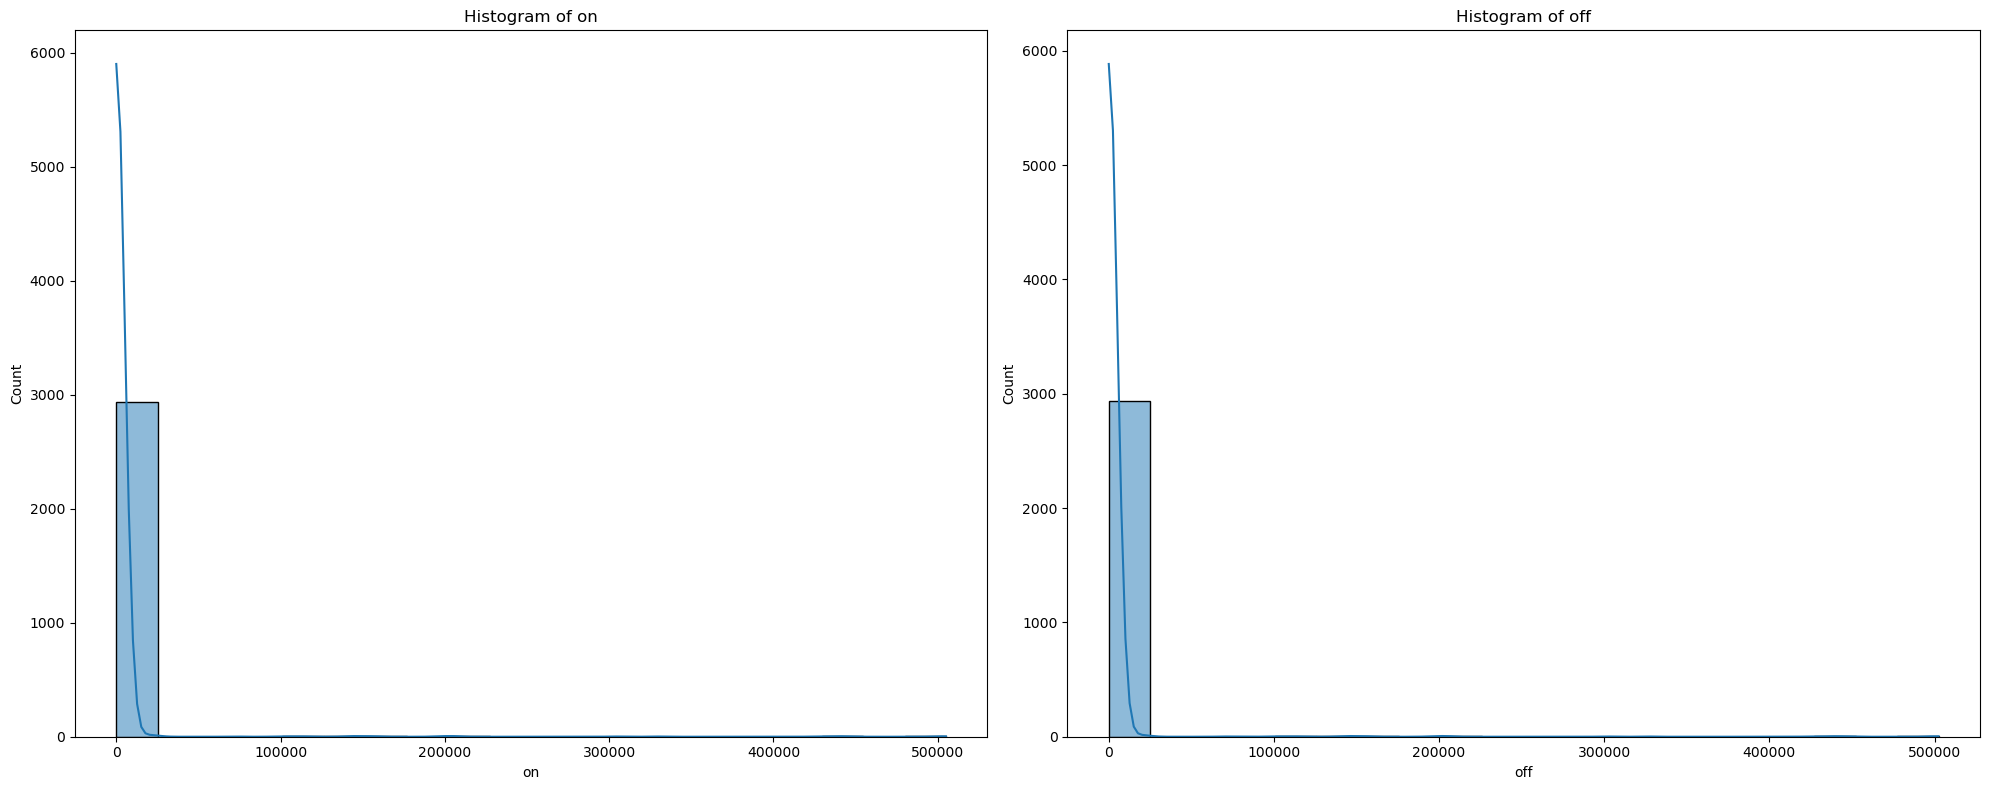

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
axes = axes.flatten()

for i, col in enumerate(['on','off']):
    sb.histplot(data=bus_data, x=col, kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

Here, we have the boxplot for year and riders getting on the bus, which shows a lot of outliers in the data.

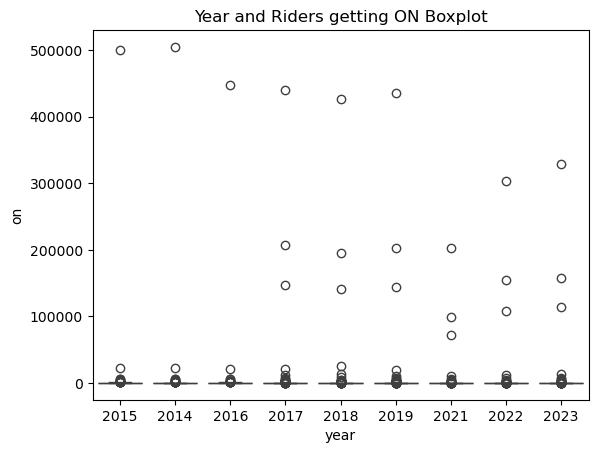

In [71]:
sb.boxplot(data=bus_data, x='year', y='on')
plt.title("Year and Riders getting ON Boxplot")
plt.show()

Here, we have the boxplot for year and riders getting off the bus, which also shows a lot of outliers in the data.

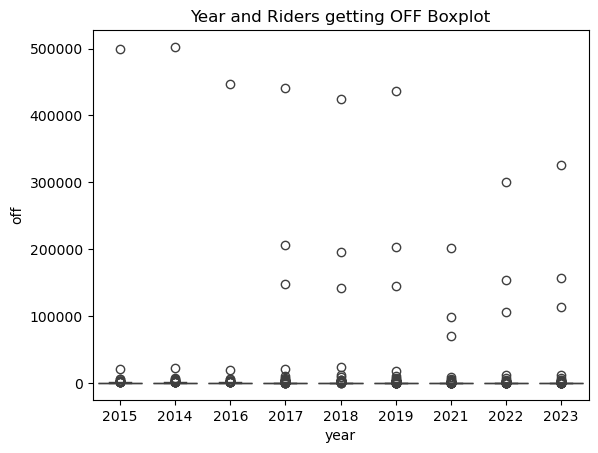

In [73]:
sb.boxplot(data=bus_data, x='year', y='off')
plt.title("Year and Riders getting OFF Boxplot")
plt.show()

Here, we have the boxplot for day type and riders getting on the bus, which shows a lot of outliers in the data.

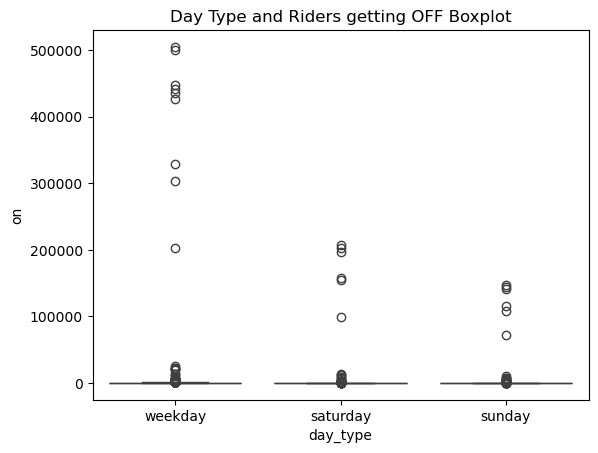

In [75]:
sb.boxplot(data=bus_data, x='day_type', y='on')
plt.title("Day Type and Riders getting OFF Boxplot")
plt.show()

Here, we have the boxplot for day type and riders getting off the bus, which shows a lot of outliers in the data.

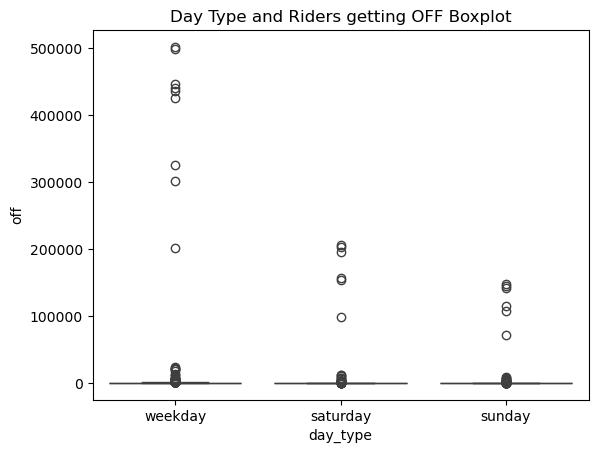

In [77]:
sb.boxplot(data=bus_data, x='day_type', y='off')
plt.title("Day Type and Riders getting OFF Boxplot")
plt.show()

## Paragraph

I made quite a few changes to the data, I changed a lot of formatting, I dropped various columns I think I won't use, I split some columns and created new ones, but overall I don't think I changed the data in a way that could possibly affect it's validity or findings.

I don't think there are any legal or regulatory guidelines on these datasets, they're all publicly available sets, both for public transport, that can't really be traced back to any small group or individual person.

I think my transformations for this assignment were pretty safe, as I didn't really change the data itself but rather the formatting or the way it was stored. I did make a new column for one of them, that being the season they represent, which may change some averages a bit since the dataset is based on month and the seasonal schedules tend to start on a specific date rather than at the beginning of the month but I'm not particularly worried this will affect the data too much.

There wasn't really any assumptions I made while working with this data. The one assumption I had was that the bus dataset would include other seasons other than fall, but that doesn't really relate to cleaning/transformations. Since the more notable transformations I made, which are the new seasons column and the splitting of season to year and season, are things I'm fairly sure I will have to use in the future, and even if I don't, they're easily reversible.

My data was sourced from OpenDataPhilly and from the SEPTA website, so I think the credibility of these sources is pretty high since one is an website that hosts datasets relating to the city of Philadelphia specifically and the other is the actual website from the transporation authority that's publishing their data.

I think my data was acquired in an ethical way, they're both from publicly available datasets that anyone can download, I didn't even need to create some sort of account or anything to access them so they're definitely being put out for people to have access to them. They're also both relating to public transportation so they're already inherently public.

I really don't have any ethical implications with the data in this assignment so I don't really have to mitigate anything, thankfully.

# Week 5 & 6: Project Milestone 3

For this milestone, since the data is coming from the website, this notebook will be formatted a bit different from my last one as a lot of the cleaning process basically needs to be done as you import the data to make it fits the dataframe properly so I'll just insert a few markdown cells like this one to point out some of my transformation/cleaning steps to make sure there's at least the five that need to be done.

## Initial Import and Cleaning/Transformations

In [89]:
# get website data using bs4
# data is for philadelphia county specifically!!!
url = "https://data.bls.gov/timeseries/LAUCN421010000000006?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [90]:
# find table0, which is the table we need, from html website data parsed
table = soup.find("table", {"id": "table0"})

# find table body from data
rows = table.find("tbody").find_all("tr")

Here, the data does get stripped for whitespaces so I will count this as the first transformation.

In [92]:
# empty dataframe for our data
data = []

# get rows from data, strip them, and append to datafrane
for tr in rows:
    ths = [th.get_text(strip=True) for th in tr.find_all("th")]  # year, period (month)
    tds = [td.get_text(strip=True) for td in tr.find_all("td")]  # numeric columns
    data.append(ths + tds)

Here, I do change and apply the header names, so I will also count this as the second transformation.

In [94]:
# add headers to dataframe manually since it's a few and I changed 'period' to 'month'
headers = ['year', 'month', 'labor_force', 'employment', 'unemployment', 'unemployment_rate']

# apply header list to dataframe
data = pd.DataFrame(data, columns=headers)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               126 non-null    object
 1   month              126 non-null    object
 2   labor_force        126 non-null    object
 3   employment         126 non-null    object
 4   unemployment       126 non-null    object
 5   unemployment_rate  126 non-null    object
dtypes: object(6)
memory usage: 6.0+ KB


Here, most of the data is cleaned of non-numeric characters apart from dots and reformatted into numeric formats so I will count this as the third and fourth transformation.

In [97]:
# function that removes everything except digits and dots from data points to avoid formatting issues/NaNs
def clean_nums(val):
    if isinstance(val, str):
        return re.sub(r'[^\d.]', '', val) # removes everything except digits and dots
    return val

In [98]:
# apply function to columns (not year and month) and convert them to numeric format
for col in data.columns[2:]:
    data[col] = data[col].apply(clean_nums)
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               126 non-null    object 
 1   month              126 non-null    object 
 2   labor_force        126 non-null    int64  
 3   employment         126 non-null    int64  
 4   unemployment       126 non-null    int64  
 5   unemployment_rate  126 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.0+ KB


In [100]:
# checks first 10 and last 10 for manual verification
print(data.head(10))
print(data.tail(10))

   year month  labor_force  employment  unemployment  unemployment_rate
0  2015   Jan       698381      642899         55482                7.9
1  2015   Feb       700621      646863         53758                7.7
2  2015   Mar       696431      644850         51581                7.4
3  2015   Apr       700919      652896         48023                6.9
4  2015   May       704072      650429         53643                7.6
5  2015   Jun       702118      649666         52452                7.5
6  2015   Jul       705300      648475         56825                8.1
7  2015   Aug       700244      646003         54241                7.7
8  2015   Sep       699850      651560         48290                6.9
9  2015   Oct       706305      658388         47917                6.8
     year month  labor_force  employment  unemployment  unemployment_rate
116  2024   Sep       783735      750540         33195                4.2
117  2024   Oct       785130      751014         34116      

In [101]:
# check data for NaNs
data.isna().sum()

year                 0
month                0
labor_force          0
employment           0
unemployment         0
unemployment_rate    0
dtype: int64

## Further Transformations

Now, I will convert the month column to numerical representations of the month, since thats how the month data for my previous milestone is setup in the other dataset, so it would make sense to do so for compatibility. I will be counting this as my fifth transformation, so I think I have now met the minimum requirements, althought I don't think there is much more to do, as the data from the website was already pretty clean.

In [104]:
# convert 3 letter abv. to numeric representation using datetime
data['month'] = pd.to_datetime(data['month'], format='%b').dt.month

In [105]:
unemployment = data

In [106]:
# check month data type
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               126 non-null    object 
 1   month              126 non-null    int32  
 2   labor_force        126 non-null    int64  
 3   employment         126 non-null    int64  
 4   unemployment       126 non-null    int64  
 5   unemployment_rate  126 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 5.5+ KB


**Project Milestone 5 Addition:** I will also create a season column to served as a join key when loading and merging data into a database.

In [108]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    elif month in [12, 1, 2]:
        return 'winter'

In [109]:
unemployment['season'] = unemployment['month'].apply(get_season)

In [110]:
unemployment.insert(2, 'season', unemployment.pop('season'))

In [111]:
# check first 15 entries to verify correct conversion
unemployment.head(15)

,year,month,season,labor_force,employment,unemployment,unemployment_rate
0,2015,1,winter,698381,642899,55482,7.9
1,2015,2,winter,700621,646863,53758,7.7
2,2015,3,spring,696431,644850,51581,7.4
3,2015,4,spring,700919,652896,48023,6.9
4,2015,5,spring,704072,650429,53643,7.6
5,2015,6,summer,702118,649666,52452,7.5
6,2015,7,summer,705300,648475,56825,8.1
7,2015,8,summer,700244,646003,54241,7.7
8,2015,9,fall,699850,651560,48290,6.9
9,2015,10,fall,706305,658388,47917,6.8


## Data Views

Here, I will make a few visualizations of the data to get an idea of the patterns within it. There is a few outliers, but I'm not too worried about them as they represent actual values taken so I will not be eliminating them. As for the dataset, the data was already pretty clean and I don't think there's much more for me to do with it just yet.

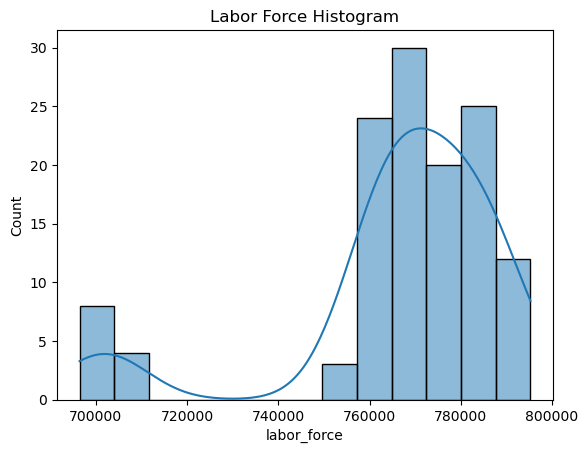

In [114]:
sb.histplot(data=unemployment, x='labor_force', kde=True)
plt.title("Labor Force Histogram")
plt.show()

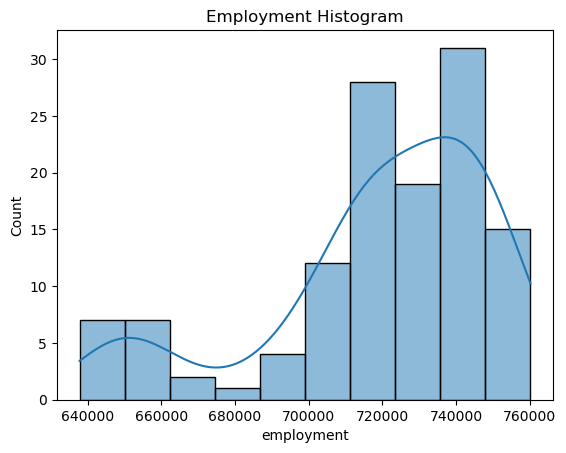

In [115]:
sb.histplot(data=unemployment, x='employment', kde=True)
plt.title("Employment Histogram")
plt.show()

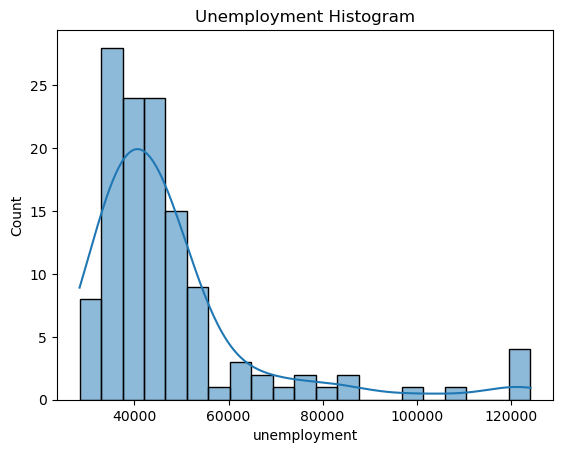

In [116]:
sb.histplot(data=unemployment, x='unemployment', kde=True)
plt.title("Unemployment Histogram")
plt.show()

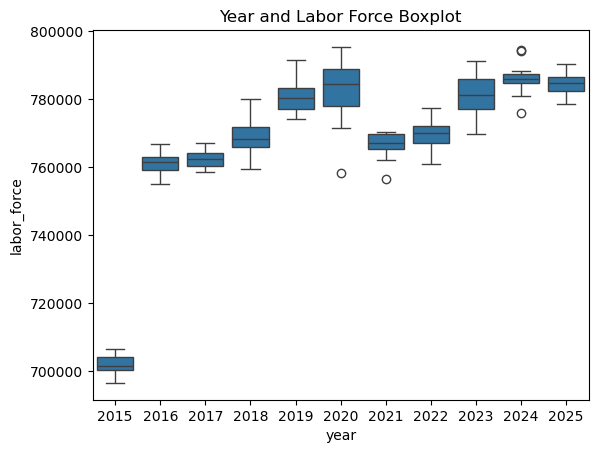

In [117]:
sb.boxplot(data=unemployment, x='year', y='labor_force')
plt.title("Year and Labor Force Boxplot")
plt.show()

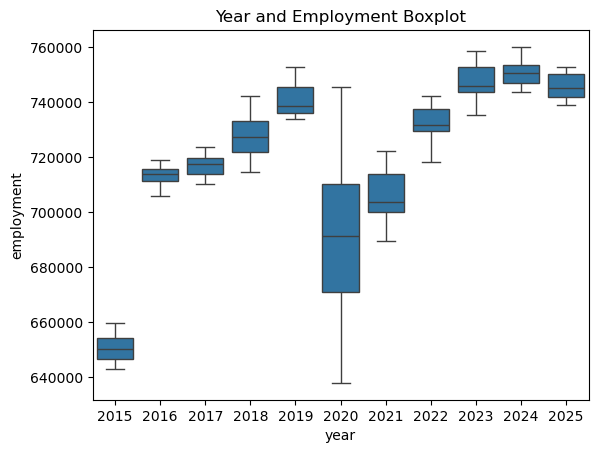

In [118]:
sb.boxplot(data=unemployment, x='year', y='employment')
plt.title("Year and Employment Boxplot")
plt.show()

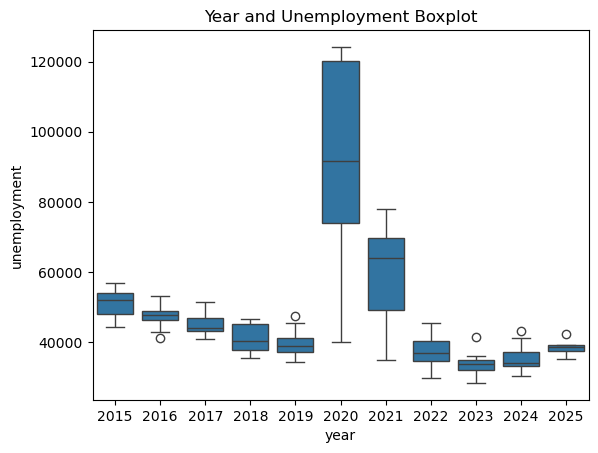

In [119]:
sb.boxplot(data=unemployment, x='year', y='unemployment')
plt.title("Year and Unemployment Boxplot")
plt.show()

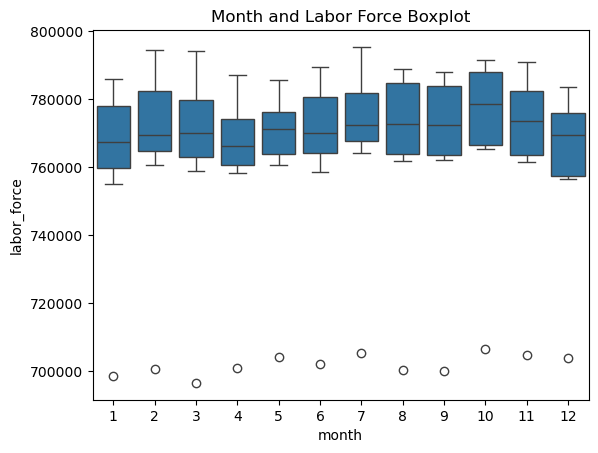

In [120]:
sb.boxplot(data=unemployment, x='month', y='labor_force')
plt.title("Month and Labor Force Boxplot")
plt.show()

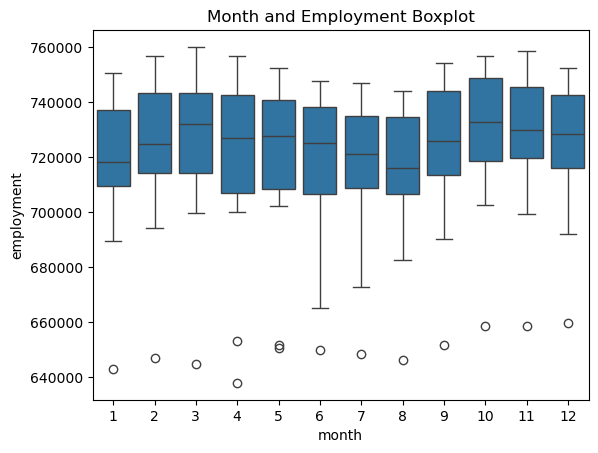

In [121]:
sb.boxplot(data=unemployment, x='month', y='employment')
plt.title("Month and Employment Boxplot")
plt.show()

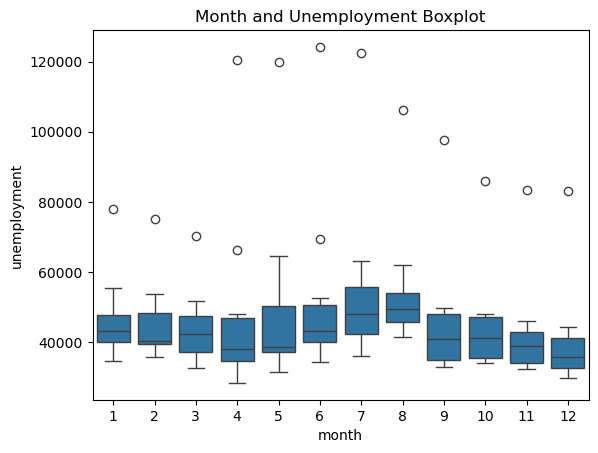

In [122]:
sb.boxplot(data=unemployment, x='month', y='unemployment')
plt.title("Month and Unemployment Boxplot")
plt.show()

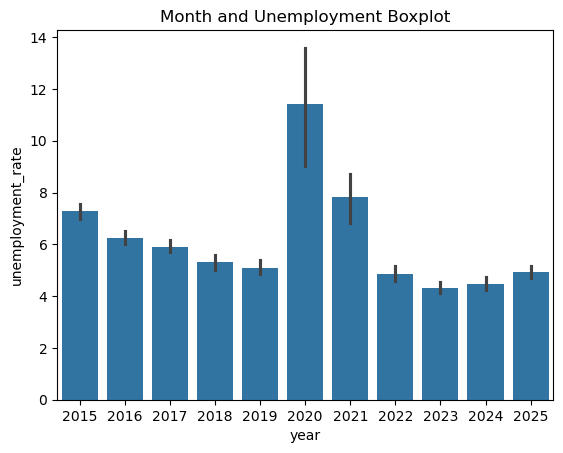

In [123]:
sb.barplot(data=unemployment, x='year', y='unemployment_rate')
plt.title("Month and Unemployment Boxplot")
plt.show()

## Paragraph

I didn't really make much changes to the data other than changing the formatting of the month to represent them numerically and changing the data types to numeric since they were all read in as strings.

I don't think there really is any legal or regulatory guidelines for my data, it's all publicly available data, both this dataset, the previous public transport one, and the future weather one. None of it can really be traced back to a single individual or a small group of individuals, just general masses of populations such as cities or counties.

I don't particularly think there could be any risks created based on the transformations I did, at most I think one may get confused due to the numerical representations for the month but nothing beyond that for this dataset.

For this dataset, I did not make any assumptions, the data in the table was already pretty clean and straightforward, it just needed to be cleaned properly to create an organized dataframe for me to work with.

My data was sourced from a goverment website, specifically the bureau of labor statistics, which isn't to say they can't make stuff up, but I think it's probably as best as I could get for this dataset without having to go out and survey things myself. 

My data was acquired in an ethical way, the data was extracted using the HTML parser, however the data was also available in the same webpage as a CSV/Excel file, so while webscrapping might be a bit controversial to some people, the data was clearly meant to be used, I just happened to extract the table rather than download the CSV file.

I really don't have any ethical implications with this dataset, so I don't have to mitigate anything, all my data was publicly available and meant for public use.

# Week 7 & 8: Project Milestone 4

**For this milestone, I actually had to switch APIs from my initial API since the initial historical weather API I inteded on using is now a paid service, so I switch to a historical weather data API with limited free credits called Open Meteo that allows me to access the data I require for this project for free.**

## API Setup and Call

Here, I setup the API call and verify the data is what I expected. I also make a deep copy since the API call is for around 10 years of historical weather data so it uses a lot of credits and since the free service has limited credits per day, I make a copy of the data received and use that instead of editing the original received data.

This API doesn't need an API key so I just add the variables I want to the URL.

In [137]:
# API URL
URL = "https://archive-api.open-meteo.com/v1/archive"

I setup the variables I want from the API in a list and then format it into the proper format for the API call to make the list of variables easier to edit.

In [139]:
# list of daily weather variables for easy editing
daily_vars = [
    "weather_code",
    "temperature_2m_mean",
    "temperature_2m_max",
    "temperature_2m_min",
    "apparent_temperature_mean",
    "apparent_temperature_max",
    "apparent_temperature_min",
    "sunrise",
    "daylight_duration",
    "sunset",
    "sunshine_duration",
    "precipitation_sum",
    "rain_sum",
    "snowfall_sum",
    "precipitation_hours",
    "wind_speed_10m_max",
    "wind_gusts_10m_max",
    "wind_direction_10m_dominant",
    "surface_pressure_mean",
    "surface_pressure_max",
    "surface_pressure_min",
    "visibility_min",
    "visibility_mean",
    "visibility_max"
]

# join list into a comma-separated string
daily_string = ",".join(daily_vars)

Here I also setup the rest of the parameters needed to get all of the previous variables for the city of Philadelphia.

In [141]:
# parameters for API request
params = {
    "latitude": 39.9524,
    "longitude": -75.1636,
    "start_date": "2015-01-01",
    "end_date": "2025-04-30",
    "daily": daily_string,
    "timezone": "America/New_York"
}

Now I call the API with the full URL link.

In [143]:
# request data from API
response = requests.get(URL, params=params)
data = response.json()

I print the keys for the received raw data to identify what I will actually need for the daily weather since it comes nested. I also print the raw data just to see how it looks.

In [145]:
# print raw data keys
print(data.keys())

dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'daily_units', 'daily'])


In [146]:
print(data)

{'latitude': 39.964848, 'longitude': -75.1676, 'generationtime_ms': 64.8949146270752, 'utc_offset_seconds': -14400, 'timezone': 'America/New_York', 'timezone_abbreviation': 'GMT-4', 'elevation': 16.0, 'daily_units': {'time': 'iso8601', 'weather_code': 'wmo code', 'temperature_2m_mean': '°C', 'temperature_2m_max': '°C', 'temperature_2m_min': '°C', 'apparent_temperature_mean': '°C', 'apparent_temperature_max': '°C', 'apparent_temperature_min': '°C', 'sunrise': 'iso8601', 'daylight_duration': 's', 'sunset': 'iso8601', 'sunshine_duration': 's', 'precipitation_sum': 'mm', 'rain_sum': 'mm', 'snowfall_sum': 'cm', 'precipitation_hours': 'h', 'wind_speed_10m_max': 'km/h', 'wind_gusts_10m_max': 'km/h', 'wind_direction_10m_dominant': '°', 'surface_pressure_mean': 'hPa', 'surface_pressure_max': 'hPa', 'surface_pressure_min': 'hPa', 'visibility_min': 'undefined', 'visibility_mean': 'undefined', 'visibility_max': 'undefined'}, 'daily': {'time': ['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04'

I create a deep copy of the data that preserved the nested data so that I can use the copy rather than the existing data to limit my API calls since they're limited. That way I always have the raw, original data stored under 'data' and can reaccess it if needed.

In [148]:
# make deep copy to preserve raw data and reduce API calls
use_data = copy.deepcopy(data)

## API Data to Dataframe

Here, I extract the daily weather data from the raw data copy and convert it into a pandas dataframe that I can properly use to clean and transform for the needs of my project.

Extract the daily data from the raw data copy and print it to verify it;s the data I want.

In [152]:
# extract daily weather data from data copy
daily_data = use_data['daily']

In [153]:
print(daily_data)

{'time': ['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04', '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08', '2015-01-09', '2015-01-10', '2015-01-11', '2015-01-12', '2015-01-13', '2015-01-14', '2015-01-15', '2015-01-16', '2015-01-17', '2015-01-18', '2015-01-19', '2015-01-20', '2015-01-21', '2015-01-22', '2015-01-23', '2015-01-24', '2015-01-25', '2015-01-26', '2015-01-27', '2015-01-28', '2015-01-29', '2015-01-30', '2015-01-31', '2015-02-01', '2015-02-02', '2015-02-03', '2015-02-04', '2015-02-05', '2015-02-06', '2015-02-07', '2015-02-08', '2015-02-09', '2015-02-10', '2015-02-11', '2015-02-12', '2015-02-13', '2015-02-14', '2015-02-15', '2015-02-16', '2015-02-17', '2015-02-18', '2015-02-19', '2015-02-20', '2015-02-21', '2015-02-22', '2015-02-23', '2015-02-24', '2015-02-25', '2015-02-26', '2015-02-27', '2015-02-28', '2015-03-01', '2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05', '2015-03-06', '2015-03-07', '2015-03-08', '2015-03-09', '2015-03-10', '2015-03-11', '2015-03-1

Convert the daily weather to a pandas dataframe to be able to use it properly.

In [155]:
# weather data to dataframe
weather = pd.DataFrame(daily_data)

In [156]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         3773 non-null   object 
 1   weather_code                 3773 non-null   int64  
 2   temperature_2m_mean          3773 non-null   float64
 3   temperature_2m_max           3773 non-null   float64
 4   temperature_2m_min           3773 non-null   float64
 5   apparent_temperature_mean    3773 non-null   float64
 6   apparent_temperature_max     3773 non-null   float64
 7   apparent_temperature_min     3773 non-null   float64
 8   sunrise                      3773 non-null   object 
 9   daylight_duration            3773 non-null   float64
 10  sunset                       3773 non-null   object 
 11  sunshine_duration            3773 non-null   float64
 12  precipitation_sum            3773 non-null   float64
 13  rain_sum          

**Data is in METRIC UNITS: Celsius (Temperature), Km/H (Wind Speed), and Millimeters (Precipitation).**

In [158]:
weather.head()

,time,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,sunrise,daylight_duration,...,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,surface_pressure_mean,surface_pressure_max,surface_pressure_min,visibility_min,visibility_mean,visibility_max
0,2015-01-01,1,-0.5,3.9,-3.6,-6.1,-2.2,-8.8,2015-01-01T08:22,33807.28,...,0.0,20.6,43.2,234,1018.1,1021.4,1014.9,None,None,None
1,2015-01-02,3,1.7,6.1,-0.8,-2.9,1.0,-4.9,2015-01-02T08:22,33850.73,...,0.0,17.5,38.2,268,1021.8,1028.1,1016.0,None,None,None
2,2015-01-03,73,1.1,5.4,-2.3,-2.4,3.5,-6.4,2015-01-03T08:22,33898.27,...,12.0,12.1,37.4,67,1028.4,1033.1,1018.8,None,None,None
3,2015-01-04,61,10.1,14.1,5.6,7.5,12.0,3.2,2015-01-04T08:22,33949.76,...,13.0,24.2,54.7,229,1009.8,1017.9,1003.6,None,None,None
4,2015-01-05,3,1.3,7.1,-3.2,-5.0,2.2,-9.3,2015-01-05T08:22,34005.09,...,0.0,26.6,55.1,287,1019.6,1029.1,1008.7,None,None,None


## Data Cleaning

Here, I clean the data by dropping empty columns and changing some column names for easier access.

### Drop Empty Columns

Here, I view the column names to see if there's any empty columns that I can drop since they would be useless to have around.

In [163]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         3773 non-null   object 
 1   weather_code                 3773 non-null   int64  
 2   temperature_2m_mean          3773 non-null   float64
 3   temperature_2m_max           3773 non-null   float64
 4   temperature_2m_min           3773 non-null   float64
 5   apparent_temperature_mean    3773 non-null   float64
 6   apparent_temperature_max     3773 non-null   float64
 7   apparent_temperature_min     3773 non-null   float64
 8   sunrise                      3773 non-null   object 
 9   daylight_duration            3773 non-null   float64
 10  sunset                       3773 non-null   object 
 11  sunshine_duration            3773 non-null   float64
 12  precipitation_sum            3773 non-null   float64
 13  rain_sum          

The visibility columns have 0 non-null entries, meaning they're completely empty and useless so I will drop them.

In [165]:
# drop empty columns
weather = weather.drop(columns={'visibility_min', 'visibility_mean', 'visibility_max'})

### Changing Column Names

Here, I view the column names to see if there's any I could change to make them easier to type or less confusing.

In [168]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   time                         3773 non-null   object 
 1   weather_code                 3773 non-null   int64  
 2   temperature_2m_mean          3773 non-null   float64
 3   temperature_2m_max           3773 non-null   float64
 4   temperature_2m_min           3773 non-null   float64
 5   apparent_temperature_mean    3773 non-null   float64
 6   apparent_temperature_max     3773 non-null   float64
 7   apparent_temperature_min     3773 non-null   float64
 8   sunrise                      3773 non-null   object 
 9   daylight_duration            3773 non-null   float64
 10  sunset                       3773 non-null   object 
 11  sunshine_duration            3773 non-null   float64
 12  precipitation_sum            3773 non-null   float64
 13  rain_sum          

I chose the following columns as they're long names that could easily be shortened while still knowing the data they contain. I also change 'apparent_temperature' to 'feel_temp' as the apparent temperature is often refered to, and known as, the feel-like temperature.

In [170]:
# rename cols for easier access
weather = weather.rename(columns={'temperature_2m_mean': 'mean_temp',
                        'temperature_2m_max': 'max_temp',
                        'temperature_2m_min': 'min_temp',

                        'apparent_temperature_mean': 'mean_feel_temp',
                        'apparent_temperature_max': 'max_feel_temp',
                        'apparent_temperature_min': 'min_feel_temp',
                        
                        'wind_speed_10m_max': 'max_wind_speed',
                        'wind_gusts_10m_max': 'max_wind_gusts',
                        'wind_direction_10m_dominant': 'wind_direction',
                        
                        'surface_pressure_mean': 'mean_pressure',
                        'surface_pressure_max': 'max_pressure',
                        'surface_pressure_min': 'min_pressure'
                       })

In [171]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 3773 non-null   object 
 1   weather_code         3773 non-null   int64  
 2   mean_temp            3773 non-null   float64
 3   max_temp             3773 non-null   float64
 4   min_temp             3773 non-null   float64
 5   mean_feel_temp       3773 non-null   float64
 6   max_feel_temp        3773 non-null   float64
 7   min_feel_temp        3773 non-null   float64
 8   sunrise              3773 non-null   object 
 9   daylight_duration    3773 non-null   float64
 10  sunset               3773 non-null   object 
 11  sunshine_duration    3773 non-null   float64
 12  precipitation_sum    3773 non-null   float64
 13  rain_sum             3773 non-null   float64
 14  snowfall_sum         3773 non-null   float64
 15  precipitation_hours  3773 non-null   f

## Data Formatting

Here, I change the formatting of some of the columns to make them easier to use. Mostly just changing the date columns to datetime format.

### Datetime

In [175]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   time                 3773 non-null   object 
 1   weather_code         3773 non-null   int64  
 2   mean_temp            3773 non-null   float64
 3   max_temp             3773 non-null   float64
 4   min_temp             3773 non-null   float64
 5   mean_feel_temp       3773 non-null   float64
 6   max_feel_temp        3773 non-null   float64
 7   min_feel_temp        3773 non-null   float64
 8   sunrise              3773 non-null   object 
 9   daylight_duration    3773 non-null   float64
 10  sunset               3773 non-null   object 
 11  sunshine_duration    3773 non-null   float64
 12  precipitation_sum    3773 non-null   float64
 13  rain_sum             3773 non-null   float64
 14  snowfall_sum         3773 non-null   float64
 15  precipitation_hours  3773 non-null   f

Use weather.head() to check which columns have date strings within them.

In [177]:
weather.head()

,time,weather_code,mean_temp,max_temp,min_temp,mean_feel_temp,max_feel_temp,min_feel_temp,sunrise,daylight_duration,...,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,max_wind_speed,max_wind_gusts,wind_direction,mean_pressure,max_pressure,min_pressure
0,2015-01-01,1,-0.5,3.9,-3.6,-6.1,-2.2,-8.8,2015-01-01T08:22,33807.28,...,0.0,0.0,0.00,0.0,20.6,43.2,234,1018.1,1021.4,1014.9
1,2015-01-02,3,1.7,6.1,-0.8,-2.9,1.0,-4.9,2015-01-02T08:22,33850.73,...,0.0,0.0,0.00,0.0,17.5,38.2,268,1021.8,1028.1,1016.0
2,2015-01-03,73,1.1,5.4,-2.3,-2.4,3.5,-6.4,2015-01-03T08:22,33898.27,...,15.6,14.8,0.56,12.0,12.1,37.4,67,1028.4,1033.1,1018.8
3,2015-01-04,61,10.1,14.1,5.6,7.5,12.0,3.2,2015-01-04T08:22,33949.76,...,9.2,9.2,0.00,13.0,24.2,54.7,229,1009.8,1017.9,1003.6
4,2015-01-05,3,1.3,7.1,-3.2,-5.0,2.2,-9.3,2015-01-05T08:22,34005.09,...,0.0,0.0,0.00,0.0,26.6,55.1,287,1019.6,1029.1,1008.7


Change the format of time, sunrise, and sunset to actual datetime format for easier use then access the date data within them.

In [179]:
# cols to datetime type
weather['time'] = pd.to_datetime(weather['time'])
weather['sunrise'] = pd.to_datetime(weather['sunrise'])
weather['sunset'] = pd.to_datetime(weather['sunset'])

In [180]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 3773 non-null   datetime64[ns]
 1   weather_code         3773 non-null   int64         
 2   mean_temp            3773 non-null   float64       
 3   max_temp             3773 non-null   float64       
 4   min_temp             3773 non-null   float64       
 5   mean_feel_temp       3773 non-null   float64       
 6   max_feel_temp        3773 non-null   float64       
 7   min_feel_temp        3773 non-null   float64       
 8   sunrise              3773 non-null   datetime64[ns]
 9   daylight_duration    3773 non-null   float64       
 10  sunset               3773 non-null   datetime64[ns]
 11  sunshine_duration    3773 non-null   float64       
 12  precipitation_sum    3773 non-null   float64       
 13  rain_sum             3773 non-nul

## New Columns 

Here, I create a few new columns from the existing columns for data that I think I might find useful, such as temperature range and marking the days where the max temp was below or at freezing

### Temperature Ranges

Here, I make temp_range and feel_temp_range by subtracting the respective min temperature for that day from the max temperature to get the range.

In [185]:
# temp range col
weather['temp_range'] = weather['max_temp'] - weather['min_temp']

In [186]:
# feel temp range col
weather['feel_temp_range'] = weather['max_feel_temp'] - weather['min_feel_temp']

In [187]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 3773 non-null   datetime64[ns]
 1   weather_code         3773 non-null   int64         
 2   mean_temp            3773 non-null   float64       
 3   max_temp             3773 non-null   float64       
 4   min_temp             3773 non-null   float64       
 5   mean_feel_temp       3773 non-null   float64       
 6   max_feel_temp        3773 non-null   float64       
 7   min_feel_temp        3773 non-null   float64       
 8   sunrise              3773 non-null   datetime64[ns]
 9   daylight_duration    3773 non-null   float64       
 10  sunset               3773 non-null   datetime64[ns]
 11  sunshine_duration    3773 non-null   float64       
 12  precipitation_sum    3773 non-null   float64       
 13  rain_sum             3773 non-nul

### Freezing Days

Here, I create freezing_day by checking which days have a max temperature of 0 degrees celscius or below, which would be considered freezing. This creates a boolean column

In [190]:
# freezing if max temp less or 0
weather['freezing_day'] = weather['max_temp'] <= 0

In [191]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 3773 non-null   datetime64[ns]
 1   weather_code         3773 non-null   int64         
 2   mean_temp            3773 non-null   float64       
 3   max_temp             3773 non-null   float64       
 4   min_temp             3773 non-null   float64       
 5   mean_feel_temp       3773 non-null   float64       
 6   max_feel_temp        3773 non-null   float64       
 7   min_feel_temp        3773 non-null   float64       
 8   sunrise              3773 non-null   datetime64[ns]
 9   daylight_duration    3773 non-null   float64       
 10  sunset               3773 non-null   datetime64[ns]
 11  sunshine_duration    3773 non-null   float64       
 12  precipitation_sum    3773 non-null   float64       
 13  rain_sum             3773 non-nul

In [192]:
weather.head()

,time,weather_code,mean_temp,max_temp,min_temp,mean_feel_temp,max_feel_temp,min_feel_temp,sunrise,daylight_duration,...,precipitation_hours,max_wind_speed,max_wind_gusts,wind_direction,mean_pressure,max_pressure,min_pressure,temp_range,feel_temp_range,freezing_day
0,2015-01-01,1,-0.5,3.9,-3.6,-6.1,-2.2,-8.8,2015-01-01 08:22:00,33807.28,...,0.0,20.6,43.2,234,1018.1,1021.4,1014.9,7.5,6.6,False
1,2015-01-02,3,1.7,6.1,-0.8,-2.9,1.0,-4.9,2015-01-02 08:22:00,33850.73,...,0.0,17.5,38.2,268,1021.8,1028.1,1016.0,6.9,5.9,False
2,2015-01-03,73,1.1,5.4,-2.3,-2.4,3.5,-6.4,2015-01-03 08:22:00,33898.27,...,12.0,12.1,37.4,67,1028.4,1033.1,1018.8,7.7,9.9,False
3,2015-01-04,61,10.1,14.1,5.6,7.5,12.0,3.2,2015-01-04 08:22:00,33949.76,...,13.0,24.2,54.7,229,1009.8,1017.9,1003.6,8.5,8.8,False
4,2015-01-05,3,1.3,7.1,-3.2,-5.0,2.2,-9.3,2015-01-05 08:22:00,34005.09,...,0.0,26.6,55.1,287,1019.6,1029.1,1008.7,10.3,11.5,False


### Seasons

**Project Milestone 5 Addition:** Since we're looking for weather patterns, I will also create a seasons column that matches the rest of the datasets' season columns.

In [195]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    elif month in [12, 1, 2]:
        return 'winter'

In [196]:
weather['season'] = weather['time'].dt.month.apply(get_season)

In [197]:
weather.insert(1, 'season', weather.pop('season'))

In [198]:
weather.head()

,time,season,weather_code,mean_temp,max_temp,min_temp,mean_feel_temp,max_feel_temp,min_feel_temp,sunrise,...,precipitation_hours,max_wind_speed,max_wind_gusts,wind_direction,mean_pressure,max_pressure,min_pressure,temp_range,feel_temp_range,freezing_day
0,2015-01-01,winter,1,-0.5,3.9,-3.6,-6.1,-2.2,-8.8,2015-01-01 08:22:00,...,0.0,20.6,43.2,234,1018.1,1021.4,1014.9,7.5,6.6,False
1,2015-01-02,winter,3,1.7,6.1,-0.8,-2.9,1.0,-4.9,2015-01-02 08:22:00,...,0.0,17.5,38.2,268,1021.8,1028.1,1016.0,6.9,5.9,False
2,2015-01-03,winter,73,1.1,5.4,-2.3,-2.4,3.5,-6.4,2015-01-03 08:22:00,...,12.0,12.1,37.4,67,1028.4,1033.1,1018.8,7.7,9.9,False
3,2015-01-04,winter,61,10.1,14.1,5.6,7.5,12.0,3.2,2015-01-04 08:22:00,...,13.0,24.2,54.7,229,1009.8,1017.9,1003.6,8.5,8.8,False
4,2015-01-05,winter,3,1.3,7.1,-3.2,-5.0,2.2,-9.3,2015-01-05 08:22:00,...,0.0,26.6,55.1,287,1019.6,1029.1,1008.7,10.3,11.5,False


In [199]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 3773 non-null   datetime64[ns]
 1   season               3773 non-null   object        
 2   weather_code         3773 non-null   int64         
 3   mean_temp            3773 non-null   float64       
 4   max_temp             3773 non-null   float64       
 5   min_temp             3773 non-null   float64       
 6   mean_feel_temp       3773 non-null   float64       
 7   max_feel_temp        3773 non-null   float64       
 8   min_feel_temp        3773 non-null   float64       
 9   sunrise              3773 non-null   datetime64[ns]
 10  daylight_duration    3773 non-null   float64       
 11  sunset               3773 non-null   datetime64[ns]
 12  sunshine_duration    3773 non-null   float64       
 13  precipitation_sum    3773 non-nul

## Paragraph

After retrieving the data from the API, I didn't really make much changes other than extracting only the weather data I need from the raw API data and changes a few of the column names and the formats, as well as making 2 new columns but nothing really changing the weather data itself.

I don't think there are any regulatory or legal guidelines regarding this data, as it was acquired from a free API that anyone can access for free with limited daily credits and no API key, or pay for for further access.

I don't think any risks could come from the transformations I've done, as most of what I did was just clean up the data and change some of the column names for better clarity and access but nothing that could cause confusion in the use of the cleaned dataset.

I did not make any assumptions while cleaning this data, I also chose to keep the data in metric units since growing up in Mexico, I'm more comfortable with using them for weather and they make more sense to be, additionally, metric units are the units typically used for collecting weather data so that also helps avoid conversion issues to imperial units.

According to the API website, the data is gathered from various sources, analyzed and compiled into a "comprehensive record of past weather conditions." The website claims to use "weather station, aircraft, buoy, radar, and satellite observations" to do so. However, while reseaching alternate historical weather data APIs to use since the original one I intended to use is now a paid service, this API came up a few time with really good reviews so I chose to use it.

I think my data was acquired in an ethical way as I simply used the publicly available API page to setup my API call to get the data I need from the historical weather database they have. Since it's a free service that doesn't even require an API key, I consider it an ethical source of data.

I don't think there's any ethical implications in the data I've acquired as it's all publicly available and basically anyone can access it if they really wanted to. Especially since my use of the API is very limited as I just need the data from the one call I made, I wouldn't even be hogging resources from the servers or anything that might cause some ethical concern in not paying for the API service.

# Week 9 & 10: Project Milestone 5

## Additional Data Source

For an additional data source, given that I've been working with data from public transportation within the city of Philadelphia, I will use the publicly available data for a bike share company called Indego. Indego has various stations around the city where you're able to rent a bike and return it at a different station, and publicly post their trip data on their website every quarter.

### Merge Data

Since Indego uploads their data quarterly, I will have to download each quarter from 2015 to 2025, as that's the span of our data for the previous flat file sources, and merge them together into one dataframe so that I can clean it properly.

In [213]:
dfs = []

# loads all files using a loop given the name formatting of the files
for year in range(2015, 2026):
    if year == 2015:
        quarters = [2, 3, 4]
    elif year == 2025:
        quarters = [1, 2]
    else:
        quarters = [1, 2, 3, 4]
    
    for q in quarters:
        filename = rf"E:\OneDrive - Bellevue University\Grad School\Data Preparation\Week 9 & 10\indego\indego-trips-{year}-q{q}.csv"
        try:
            df = pd.read_csv(filename, low_memory=False)
            dfs.append(df)
        except FileNotFoundError:
            print(f"File not found: {filename}")

data = pd.concat(dfs, ignore_index=True)

Now, we have all 41 files merged into 1 dataframe that I can continue to clean up for the little information we'll need from it.

In [215]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811118 entries, 0 to 8811117
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   trip_id              int64  
 1   duration             int64  
 2   start_time           object 
 3   end_time             object 
 4   start_station_id     float64
 5   start_lat            object 
 6   start_lon            object 
 7   end_station_id       float64
 8   end_lat              object 
 9   end_lon              object 
 10  bike_id              object 
 11  plan_duration        float64
 12  trip_route_category  object 
 13  passholder_type      object 
 14  start_station        float64
 15  end_station          float64
 16  bike_type            object 
dtypes: float64(5), int64(2), object(10)
memory usage: 1.1+ GB


### Drop Unnecessary Columns

Since the point of my data is to study public transporation use patterns along with unemployment rates and weather patterns, we'll only need some of the data given to us by Indego. I mainly need a count of the people using the bikes each day, the dates, and the bike type. Since Indego is a Philadelphia service, all of the data comes only from within the city, so we don't necessarily need location information for this dataset.

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811118 entries, 0 to 8811117
Data columns (total 17 columns):
 #   Column               Dtype  
---  ------               -----  
 0   trip_id              int64  
 1   duration             int64  
 2   start_time           object 
 3   end_time             object 
 4   start_station_id     float64
 5   start_lat            object 
 6   start_lon            object 
 7   end_station_id       float64
 8   end_lat              object 
 9   end_lon              object 
 10  bike_id              object 
 11  plan_duration        float64
 12  trip_route_category  object 
 13  passholder_type      object 
 14  start_station        float64
 15  end_station          float64
 16  bike_type            object 
dtypes: float64(5), int64(2), object(10)
memory usage: 1.1+ GB


In [219]:
data = data.drop(columns= {'trip_id', 'start_station_id', 'start_lat', 'start_lon', 'end_station_id', 'end_lat', 'end_lon', 'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type', 'start_station', 'end_station'})

In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811118 entries, 0 to 8811117
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   duration    int64 
 1   start_time  object
 2   end_time    object
 3   bike_type   object
dtypes: int64(1), object(3)
memory usage: 268.9+ MB


### Data Type Formatting

#### Date Formatting

Since we'll be using dates, I will format our start and end time columns into DateTime data types for easier data handling.

In [224]:
data.head(10)

,duration,start_time,end_time,bike_type
0,60,4/23/15 7:44,4/23/15 7:45,NaN
1,60,4/23/15 7:45,4/23/15 7:46,NaN
2,120,4/23/15 7:46,4/23/15 7:48,NaN
3,60,4/23/15 10:13,4/23/15 10:14,NaN
4,180,4/23/15 10:14,4/23/15 10:17,NaN
5,60,4/23/15 10:14,4/23/15 10:15,NaN
6,60,4/23/15 10:15,4/23/15 10:16,NaN
7,900,4/23/15 10:24,4/23/15 10:39,NaN
8,120,4/23/15 10:36,4/23/15 10:38,NaN
9,60,4/23/15 10:38,4/23/15 10:39,NaN


In [225]:
data.tail(10)

,duration,start_time,end_time,bike_type
8811108,7,6/30/2025 23:29,6/30/2025 23:36,standard
8811109,7,6/30/2025 23:32,6/30/2025 23:39,electric
8811110,13,6/30/2025 23:32,6/30/2025 23:45,standard
8811111,11,6/30/2025 23:35,6/30/2025 23:46,electric
8811112,8,6/30/2025 23:37,6/30/2025 23:45,electric
8811113,24,6/30/2025 23:37,7/1/2025 0:01,standard
8811114,6,6/30/2025 23:50,6/30/2025 23:56,electric
8811115,5,6/30/2025 23:51,6/30/2025 23:56,standard
8811116,437,6/30/2025 23:54,7/1/2025 7:11,electric
8811117,9,6/30/2025 23:57,7/1/2025 0:06,electric


As we can see, dates in the tail are formatted slightly differently that dates in the head, notably the YYYY vs YY format for the year, which does affect the datetime conversion. Therefore, I decided to turn everything into strings and group them together using regex to parse the groups individually to avoid any issues.

In [227]:
# Convert to string
start_time = data['start_time'].astype(str)
end_time = data['end_time'].astype(str)

In [228]:
# Year format groupings
sYY = start_time.str.contains(r'/\d{2}(?: |$)', na=False) # checks for /YY and space
sYYYY = start_time.str.contains(r'/\d{4}(?: |$)', na=False) # checks for /YYYY and space

eYY = end_time.str.contains(r'/\d{2}(?: |$)', na=False) # checks for /YY and space
eYYYY = end_time.str.contains(r'/\d{4}(?: |$)', na=False) # checks for /YYYY and space

# Already datetime format entries
sDTs = ~(sYY | sYYYY) # not in sYY or sYYYY
eDTs = ~(eYY | eYYYY) # not in eYY or eYYYY

In [229]:
# 2 digit year entries to datetime
start_2digit = pd.to_datetime(
    data.loc[sYY, 'start_time'],
    format='%m/%d/%y %H:%M',
    errors='coerce'
)

end_2digit = pd.to_datetime(
    data.loc[eYY, 'end_time'],
    format='%m/%d/%y %H:%M',
    errors='coerce'
)

# 4 digit year entries to datetime
start_4digit = pd.to_datetime(
    data.loc[sYYYY, 'start_time'],
    format='%m/%d/%Y %H:%M',
    errors='coerce'
)

end_4digit = pd.to_datetime(
    data.loc[eYYYY, 'end_time'],
    format='%m/%d/%Y %H:%M',
    errors='coerce'
)

# Dates with other formatting issues or already datetime formats
start_DT = pd.to_datetime(
    data.loc[sDTs, 'start_time'],
    errors='coerce'
)

end_DT = pd.to_datetime(
    data.loc[eDTs, 'end_time'],
    errors='coerce'
)

In [230]:
# Merge into new columns
data['start_time_parsed'] = pd.NaT
data.loc[start_2digit.index, 'start_time_parsed'] = start_2digit
data.loc[start_4digit.index, 'start_time_parsed'] = start_4digit
data.loc[start_DT.index, 'start_time_parsed'] = start_DT

data['end_time_parsed'] = pd.NaT
data.loc[end_2digit.index, 'end_time_parsed'] = end_2digit
data.loc[end_4digit.index, 'end_time_parsed'] = end_4digit
data.loc[end_DT.index, 'end_time_parsed'] = end_DT


In [231]:
# Formatted data into original
data['start_time'] = data['start_time_parsed']
data['end_time'] = data['end_time_parsed']

In [232]:
# Drop placeholder columns we made
data = data.drop(columns={'start_time_parsed','end_time_parsed'})

Here, I check to see if there's any NaN entries in the data we just formatted to make sure that we formatted every date properly.

In [234]:
data.isna().sum()

duration            0
start_time          0
end_time            0
bike_type     2174292
dtype: int64

In [235]:
data['start_time'].head()

0   2015-04-23 07:44:00
1   2015-04-23 07:45:00
2   2015-04-23 07:46:00
3   2015-04-23 10:13:00
4   2015-04-23 10:14:00
Name: start_time, dtype: datetime64[ns]

In [236]:
data['start_time'].tail()

8811113   2025-06-30 23:37:00
8811114   2025-06-30 23:50:00
8811115   2025-06-30 23:51:00
8811116   2025-06-30 23:54:00
8811117   2025-06-30 23:57:00
Name: start_time, dtype: datetime64[ns]

In [237]:
data['end_time'].head()

0   2015-04-23 07:45:00
1   2015-04-23 07:46:00
2   2015-04-23 07:48:00
3   2015-04-23 10:14:00
4   2015-04-23 10:17:00
Name: end_time, dtype: datetime64[ns]

In [238]:
data['end_time'].tail()

8811113   2025-07-01 00:01:00
8811114   2025-06-30 23:56:00
8811115   2025-06-30 23:56:00
8811116   2025-07-01 07:11:00
8811117   2025-07-01 00:06:00
Name: end_time, dtype: datetime64[ns]

#### Date Grouping

Since we're looking at weather patterns and unemployment rates, along with our other datasets, we don't need our bike data to be day-by-day so I will convert the start and end time to month and year, as that's the format that our previous datasets have used. However, I will keep the day date for further possible analysis on weather patterns for our bike data since the weather data is also day-by-day rather than monthly.

In [241]:
# Makes new columns from extracted data
data['start_month'] = data['start_time'].dt.month
data['start_year'] = data['start_time'].dt.year

In [242]:
# Makes new columns from extracted data
data['end_month'] = data['end_time'].dt.month
data['end_year'] = data['end_time'].dt.year

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811118 entries, 0 to 8811117
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   duration     int64         
 1   start_time   datetime64[ns]
 2   end_time     datetime64[ns]
 3   bike_type    object        
 4   start_month  int32         
 5   start_year   int32         
 6   end_month    int32         
 7   end_year     int32         
dtypes: datetime64[ns](2), int32(4), int64(1), object(1)
memory usage: 403.3+ MB


In [244]:
print(data[['start_month', 'start_year', 'end_month', 'end_year']].head())

   start_month  start_year  end_month  end_year
0            4        2015          4      2015
1            4        2015          4      2015
2            4        2015          4      2015
3            4        2015          4      2015
4            4        2015          4      2015


Now, I pop and re-insert the column in certain indexes just because i think the order makes more sense to me.

In [246]:
data.insert(2, 'start_month', data.pop('start_month'))
data.insert(3, 'start_year', data.pop('start_year'))

In [247]:
data.insert(5, 'end_month', data.pop('end_month'))
data.insert(6, 'end_year', data.pop('end_year'))

In [248]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811118 entries, 0 to 8811117
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   duration     int64         
 1   start_time   datetime64[ns]
 2   start_month  int32         
 3   start_year   int32         
 4   end_time     datetime64[ns]
 5   end_month    int32         
 6   end_year     int32         
 7   bike_type    object        
dtypes: datetime64[ns](2), int32(4), int64(1), object(1)
memory usage: 403.3+ MB


#### Changing Headers

After all the formatting on the date columns, I think start_time and end_time might be better off named as start_date and end_date since it provides the full date AND time rather than just the time.

In [251]:
data = data.rename(columns={'start_time': 'start_date', 'end_time': 'end_date'})

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811118 entries, 0 to 8811117
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   duration     int64         
 1   start_date   datetime64[ns]
 2   start_month  int32         
 3   start_year   int32         
 4   end_date     datetime64[ns]
 5   end_month    int32         
 6   end_year     int32         
 7   bike_type    object        
dtypes: datetime64[ns](2), int32(4), int64(1), object(1)
memory usage: 403.3+ MB


### Seasons Column

Since we'll be joining all the datasets into a database, I will create a season column, as I have with all the other datasets, to work as a join key but also to easily know what season an entry is taking place without having to calculate the season for every entry later on. Since we have both start and end months, I will base the season column on the start date.

In [255]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'spring'
    elif month in [6, 7, 8]:
        return 'summer'
    elif month in [9, 10, 11]:
        return 'fall'
    elif month in [12, 1, 2]:
        return 'winter'

In [256]:
data['season'] = data['start_month'].apply(get_season)

In [257]:
data.insert(1, 'season', data.pop('season'))

In [258]:
data.head(15)

,duration,season,start_date,start_month,start_year,end_date,end_month,end_year,bike_type
0,60,spring,2015-04-23 07:44:00,4,2015,2015-04-23 07:45:00,4,2015,NaN
1,60,spring,2015-04-23 07:45:00,4,2015,2015-04-23 07:46:00,4,2015,NaN
2,120,spring,2015-04-23 07:46:00,4,2015,2015-04-23 07:48:00,4,2015,NaN
3,60,spring,2015-04-23 10:13:00,4,2015,2015-04-23 10:14:00,4,2015,NaN
4,180,spring,2015-04-23 10:14:00,4,2015,2015-04-23 10:17:00,4,2015,NaN
5,60,spring,2015-04-23 10:14:00,4,2015,2015-04-23 10:15:00,4,2015,NaN
6,60,spring,2015-04-23 10:15:00,4,2015,2015-04-23 10:16:00,4,2015,NaN
7,900,spring,2015-04-23 10:24:00,4,2015,2015-04-23 10:39:00,4,2015,NaN
8,120,spring,2015-04-23 10:36:00,4,2015,2015-04-23 10:38:00,4,2015,NaN
9,60,spring,2015-04-23 10:38:00,4,2015,2015-04-23 10:39:00,4,2015,NaN


### Dealing with NaNs

As we can see, there is a lot of entries with the bike type missing. However, after some research, I found that Indego did not have electric bikes until around 2019. Specifically, in 2018 they released 10 electric bikes as a test run and given the success of that test run, they implemented around 400 electric bikes in May 2019. From this, we can fill in the bike type for any bike rides before May 2019 as 'standard' as the 10 electric bikes in 2018 are negligible.

In [261]:
data.isna().sum()

duration             0
season               0
start_date           0
start_month          0
start_year           0
end_date             0
end_month            0
end_year             0
bike_type      2174292
dtype: int64

In [262]:
data['bike_type'].value_counts()

bike_type
standard    3981892
electric    2654934
Name: count, dtype: int64

In [263]:
# Groups NaN entries in bike type before May 2019
toFill = data['bike_type'].isna() & (data['start_date'] < pd.Timestamp('2019-05-01'))

# Marks entries as standard
data.loc[toFill, 'bike_type'] = 'standard'

Surprisingly, this solved all of our NaNs, I was expecting some sort of missing data errors but it seems all we were missing was the pre-electric bike classifications being marked as there was likely no reason to specificy bike type at that time.

In [265]:
data['bike_type'].value_counts()

bike_type
standard    6156184
electric    2654934
Name: count, dtype: int64

In [266]:
data.isna().sum()

duration       0
season         0
start_date     0
start_month    0
start_year     0
end_date       0
end_month      0
end_year       0
bike_type      0
dtype: int64

In [267]:
bike_data = data

In [268]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811118 entries, 0 to 8811117
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   duration     int64         
 1   season       object        
 2   start_date   datetime64[ns]
 3   start_month  int32         
 4   start_year   int32         
 5   end_date     datetime64[ns]
 6   end_month    int32         
 7   end_year     int32         
 8   bike_type    object        
dtypes: datetime64[ns](2), int32(4), int64(1), object(2)
memory usage: 470.6+ MB


### Bike Type Formatting

I will also format the bike type column as to help integrate it later on when I join them all into a database, that way the ridership and bike type integrate nicely with the transporation mode columns of the other dataset.

In [271]:
def bike_type_to_trans_mode(bike_type):
    if 'electric' in bike_type:
        return 'electricbike'
    elif 'standard' in bike_type:
        return 'standardbike'

In [272]:
bike_data['bike_type'] = bike_data['bike_type'].apply(bike_type_to_trans_mode)

In [273]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811118 entries, 0 to 8811117
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   duration     int64         
 1   season       object        
 2   start_date   datetime64[ns]
 3   start_month  int32         
 4   start_year   int32         
 5   end_date     datetime64[ns]
 6   end_month    int32         
 7   end_year     int32         
 8   bike_type    object        
dtypes: datetime64[ns](2), int32(4), int64(1), object(2)
memory usage: 470.6+ MB


In [274]:
bike_data['bike_type'].value_counts()

bike_type
standardbike    6156184
electricbike    2654934
Name: count, dtype: int64

### Paragraph

Most of the changes I did to the data were dropping a lot of columns that I didn't really need such as the station ids or the trip id and a lot of formatting work to handle the different date formatting across the multiple CSV files, since they're posted quarterly so I had to download them all and then combined them into a singular dataframe.

I don't think there's any legal or regulatory guidelines for this data or the rest of my project as I'm using public datasets for public services so they tend to not be detailed enough to risk anyones privacy or don't come with the data to make any connections to anyone. The only issue was that this data did include the trip id number for every trip, which depending on how Indego stores their user data, might possibly be used to track down individuals if there was some sort of data leak that could tie users to these trip ids.

I don't think there was any risks with the transformations I made, the data was pretty straight forward other than some formatting issues and I got it directly from the Indego website so I don't really think there's any risks. In an ethical sense, I think I may have reduced the risks of my work affecting anyone since I had no real use for the trip ids and dropped the column entirely.

I initially made some assumptions while cleaning and transforming the data, such as all dates being the same format and then proceeded to find out I was clearly wrong and had to do quite a lot of date formatting to get all the date data in the same format. Another assumption was that Indego had always had electric bikes as they're very popular and everyone seems to take them so I assumed the bike type column was going to be fully populated until I checked for NaNs and saw a lot of entries missing. From there, I simply looked up when the electrib bikes were introduced and saw it was a few years after Indego started so everything before that was a standard bike and surprisingly that was all the data that was missing. This was most likely due to them not having a need to a bike type column before that since there was only 1 type of bike.

My data was sourced from the Indego website so I'm pretty confident the data is credible and genuine. Additionally, I verified that the website was actually the official site, which it was, and also that all the data was only from Philadelphia, which it is, and found that Indego is a Philadelphia service meaning that there's no external data mixed into our dataset.

I acquired the data in an ethical way, as I simply downloaded the public datasets for each quarter from 2015 to 2025 on the Indego website and merged them together so I don't there there's really any ethical implications about how I obtained this data. Additionally, since Indego uses a mobile app or a touchscreen terminal at the bike stations to checkout/rent a bicycle, I believe the data was most likely acquired ethically as it's data they definitely need to keep track of traffic and usage accross the city.

Like I mentioned before, my main concern is the trip id column as I'm not sure of how Indego keeps track of their user data, so there's always the possibility that if trip ids are tied to a user id that can access the user's info that some sort of internal data leak that exposes this can affect people's privacy by making it significantly easier to track specific users. For my project I ended up dropping the trip id column and if I was Indego I would make sure to make sure these trip ids aren't able to be tied to specific users.

## Project Milestone 5

### Datasets Info

In [285]:
bus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961 entries, 0 to 2960
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   county      2961 non-null   object
 1   muni        2961 non-null   object
 2   trans_mode  2961 non-null   object
 3   season      2961 non-null   object
 4   year        2961 non-null   object
 5   day_type    2961 non-null   object
 6   on          2961 non-null   int64 
 7   off         2961 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 185.2+ KB


In [286]:
mode_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456 entries, 0 to 455
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   year              456 non-null    int64 
 1   month             456 non-null    int64 
 2   season            456 non-null    object
 3   trans_mode        456 non-null    object
 4   avg_daily_riders  456 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 17.9+ KB


In [287]:
mode_data.head()

,year,month,season,trans_mode,avg_daily_riders
0,2019,1,winter,bus,459160
1,2019,1,winter,cct,4294
2,2019,1,winter,heavyrail,296709
3,2019,1,winter,regionalrail,122856
4,2019,1,winter,tracklesstrolley,16853


In [288]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               126 non-null    object 
 1   month              126 non-null    int32  
 2   season             126 non-null    object 
 3   labor_force        126 non-null    int64  
 4   employment         126 non-null    int64  
 5   unemployment       126 non-null    int64  
 6   unemployment_rate  126 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 6.5+ KB


In [289]:
unemployment.head()

,year,month,season,labor_force,employment,unemployment,unemployment_rate
0,2015,1,winter,698381,642899,55482,7.9
1,2015,2,winter,700621,646863,53758,7.7
2,2015,3,spring,696431,644850,51581,7.4
3,2015,4,spring,700919,652896,48023,6.9
4,2015,5,spring,704072,650429,53643,7.6


In [290]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   time                 3773 non-null   datetime64[ns]
 1   season               3773 non-null   object        
 2   weather_code         3773 non-null   int64         
 3   mean_temp            3773 non-null   float64       
 4   max_temp             3773 non-null   float64       
 5   min_temp             3773 non-null   float64       
 6   mean_feel_temp       3773 non-null   float64       
 7   max_feel_temp        3773 non-null   float64       
 8   min_feel_temp        3773 non-null   float64       
 9   sunrise              3773 non-null   datetime64[ns]
 10  daylight_duration    3773 non-null   float64       
 11  sunset               3773 non-null   datetime64[ns]
 12  sunshine_duration    3773 non-null   float64       
 13  precipitation_sum    3773 non-nul

In [291]:
weather.head()

,time,season,weather_code,mean_temp,max_temp,min_temp,mean_feel_temp,max_feel_temp,min_feel_temp,sunrise,...,precipitation_hours,max_wind_speed,max_wind_gusts,wind_direction,mean_pressure,max_pressure,min_pressure,temp_range,feel_temp_range,freezing_day
0,2015-01-01,winter,1,-0.5,3.9,-3.6,-6.1,-2.2,-8.8,2015-01-01 08:22:00,...,0.0,20.6,43.2,234,1018.1,1021.4,1014.9,7.5,6.6,False
1,2015-01-02,winter,3,1.7,6.1,-0.8,-2.9,1.0,-4.9,2015-01-02 08:22:00,...,0.0,17.5,38.2,268,1021.8,1028.1,1016.0,6.9,5.9,False
2,2015-01-03,winter,73,1.1,5.4,-2.3,-2.4,3.5,-6.4,2015-01-03 08:22:00,...,12.0,12.1,37.4,67,1028.4,1033.1,1018.8,7.7,9.9,False
3,2015-01-04,winter,61,10.1,14.1,5.6,7.5,12.0,3.2,2015-01-04 08:22:00,...,13.0,24.2,54.7,229,1009.8,1017.9,1003.6,8.5,8.8,False
4,2015-01-05,winter,3,1.3,7.1,-3.2,-5.0,2.2,-9.3,2015-01-05 08:22:00,...,0.0,26.6,55.1,287,1019.6,1029.1,1008.7,10.3,11.5,False


In [292]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8811118 entries, 0 to 8811117
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   duration     int64         
 1   season       object        
 2   start_date   datetime64[ns]
 3   start_month  int32         
 4   start_year   int32         
 5   end_date     datetime64[ns]
 6   end_month    int32         
 7   end_year     int32         
 8   bike_type    object        
dtypes: datetime64[ns](2), int32(4), int64(1), object(2)
memory usage: 470.6+ MB


In [293]:
bike_data.head()

,duration,season,start_date,start_month,start_year,end_date,end_month,end_year,bike_type
0,60,spring,2015-04-23 07:44:00,4,2015,2015-04-23 07:45:00,4,2015,standardbike
1,60,spring,2015-04-23 07:45:00,4,2015,2015-04-23 07:46:00,4,2015,standardbike
2,120,spring,2015-04-23 07:46:00,4,2015,2015-04-23 07:48:00,4,2015,standardbike
3,60,spring,2015-04-23 10:13:00,4,2015,2015-04-23 10:14:00,4,2015,standardbike
4,180,spring,2015-04-23 10:14:00,4,2015,2015-04-23 10:17:00,4,2015,standardbike


### Load to Database

In [295]:
try:
    conn = sqlite3.connect("transportation.db")
    print("Connection successful.")
    
except sqlite3.Error as error:
    print("Failed to connect:", error)

cursor = conn.cursor()

Connection successful.


In [296]:
mode_data.to_sql("mode_data", conn, if_exists="replace", index=False)

456

In [297]:
unemployment.to_sql("unemployment", conn, if_exists="replace", index=False)

126

In [298]:
weather.to_sql("weather", conn, if_exists="replace", index=False)

3773

In [299]:
bike_data.to_sql("bike_data", conn, if_exists="replace", index=False)

8811118

### Join Tables

In [301]:
# Get weather features and group weather by year, month, and season
query_weather = """
CREATE TABLE weather_processed AS
SELECT
    CAST(STRFTIME('%Y', time) AS INT) AS year,
    CAST(STRFTIME('%m', time) AS INT) AS month,
    season,
    AVG(mean_temp) AS avg_temp,
    AVG(max_temp) AS avg_max_temp,
    AVG(min_temp) AS avg_min_temp,
    AVG(mean_feel_temp) AS avg_feel_temp,
    AVG(max_feel_temp) AS avg_max_feel_temp,
    AVG(min_feel_temp) AS avg_min_feel_temp,
    AVG(daylight_duration) AS avg_daylight_duration,
    AVG(precipitation_sum) AS avg_precip,
    AVG(rain_sum) AS avg_rain,
    AVG(snowfall_sum) AS avg_snowfall,
    AVG(precipitation_hours) AS avg_precip_hours,
    AVG(max_wind_speed) AS avg_max_wind_speed,
    AVG(max_wind_gusts) AS avg_max_wind_gusts,
    AVG(mean_pressure) AS avg_mean_pressure,
    AVG(max_pressure) AS avg_max_pressure,
    AVG(min_pressure) AS avg_min_pressure,
    SUM(CAST(freezing_day AS INT)) AS freezing_days_count
FROM weather
GROUP BY year, month, season;
"""
conn.execute(query_weather)

In [302]:
# Group bike data by year, month, and bike_type
query_bike = """
CREATE TABLE bike_processed AS
SELECT
    start_year AS year,
    start_month AS month,
    season,
    bike_type,
    COUNT(*) AS total_bike_rides
FROM bike_data
GROUP BY year, month, season, bike_type;
"""
conn.execute(query_bike)

In [303]:
# Join mode_data and bike_processed table
mode_bike_join="""
CREATE TABLE mode_bike AS
SELECT
    year,
    month,
    season,
    trans_mode,
    avg_daily_riders,
    NULL AS total_bike_rides
FROM mode_data

UNION ALL

SELECT
    year,
    month,
    season,
    bike_type AS trans_mode,
    NULL AS avg_daily_riders,
    total_bike_rides
FROM bike_processed;
"""
conn.execute(mode_bike_join)

In [304]:
# Join mode_bike table with unemployment
mode_bike_unemp_join="""
CREATE TABLE mode_bike_unemp AS
SELECT
    mb.*,
    u.labor_force,
    u.employment,
    u.unemployment,
    u.unemployment_rate
FROM mode_bike mb
LEFT JOIN unemployment u
  ON mb.year = u.year
 AND mb.month = u.month
 AND mb.season = u.season;

"""
conn.execute(mode_bike_unemp_join)

In [305]:
# Join mode_bike_unemp table with weather_processed table
mode_bike_unemp_weather="""
CREATE TABLE merged_data AS
SELECT
    mbu.*,
    w.avg_temp,
    w.avg_max_temp,
    w.avg_min_temp,
    w.avg_feel_temp,
    w.avg_max_feel_temp,
    w.avg_min_feel_temp,
    w.avg_daylight_duration,
    w.avg_precip,
    w.avg_rain,
    w.avg_snowfall,
    w.avg_precip_hours,
    w.avg_max_wind_speed,
    w.avg_max_wind_gusts,
    w.avg_mean_pressure,
    w.avg_max_pressure,
    w.avg_min_pressure,
    w.freezing_days_count,
    CASE
        WHEN mbu.trans_mode IN ('standardbike', 'electricbike') AND mbu.avg_daily_riders IS NULL THEN mbu.total_bike_rides
        ELSE mbu.avg_daily_riders
    END AS ridership
FROM mode_bike_unemp mbu
LEFT JOIN weather_processed w
  ON mbu.year = w.year
 AND mbu.month = w.month
 AND mbu.season = w.season;
"""
conn.execute(mode_bike_unemp_weather)

### Dataframe from Database

In [307]:
data = pd.read_sql_query("SELECT * FROM merged_data", conn)
conn.close()

In [308]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   660 non-null    int64  
 1   month                  660 non-null    int64  
 2   season                 660 non-null    object 
 3   trans_mode             660 non-null    object 
 4   avg_daily_riders       456 non-null    float64
 5   total_bike_rides       204 non-null    float64
 6   labor_force            660 non-null    int64  
 7   employment             660 non-null    int64  
 8   unemployment           660 non-null    int64  
 9   unemployment_rate      660 non-null    float64
 10  avg_temp               656 non-null    float64
 11  avg_max_temp           656 non-null    float64
 12  avg_min_temp           656 non-null    float64
 13  avg_feel_temp          656 non-null    float64
 14  avg_max_feel_temp      656 non-null    float64
 15  avg_mi

In [309]:
data.head()

,year,month,season,trans_mode,avg_daily_riders,total_bike_rides,labor_force,employment,unemployment,unemployment_rate,...,avg_rain,avg_snowfall,avg_precip_hours,avg_max_wind_speed,avg_max_wind_gusts,avg_mean_pressure,avg_max_pressure,avg_min_pressure,freezing_days_count,ridership
0,2019,1,winter,bus,459160.0,NaN,777223,734078,43145,5.6,...,3.16129,0.207742,3.580645,21.667742,41.032258,1016.974194,1022.367742,1011.780645,2.0,459160
1,2019,1,winter,cct,4294.0,NaN,777223,734078,43145,5.6,...,3.16129,0.207742,3.580645,21.667742,41.032258,1016.974194,1022.367742,1011.780645,2.0,4294
2,2019,1,winter,heavyrail,296709.0,NaN,777223,734078,43145,5.6,...,3.16129,0.207742,3.580645,21.667742,41.032258,1016.974194,1022.367742,1011.780645,2.0,296709
3,2019,1,winter,regionalrail,122856.0,NaN,777223,734078,43145,5.6,...,3.16129,0.207742,3.580645,21.667742,41.032258,1016.974194,1022.367742,1011.780645,2.0,122856
4,2019,1,winter,tracklesstrolley,16853.0,NaN,777223,734078,43145,5.6,...,3.16129,0.207742,3.580645,21.667742,41.032258,1016.974194,1022.367742,1011.780645,2.0,16853


### Data Visualizations

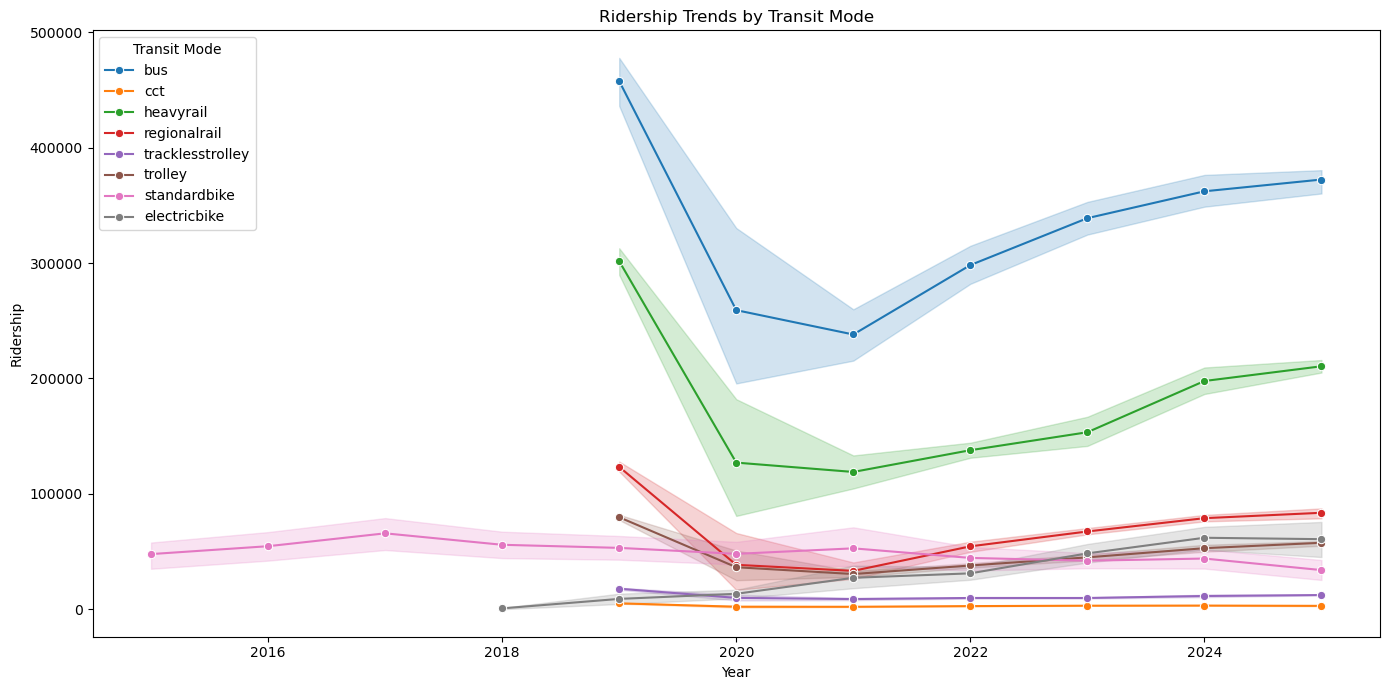

In [311]:
plt.figure(figsize=(14,7))
sb.lineplot(data=data, x='year', y='ridership',hue='trans_mode', marker='o')
plt.title('Ridership Trends by Transit Mode')
plt.ylabel('Ridership')
plt.xlabel('Year')
plt.legend(title='Transit Mode')
plt.tight_layout()
plt.show()

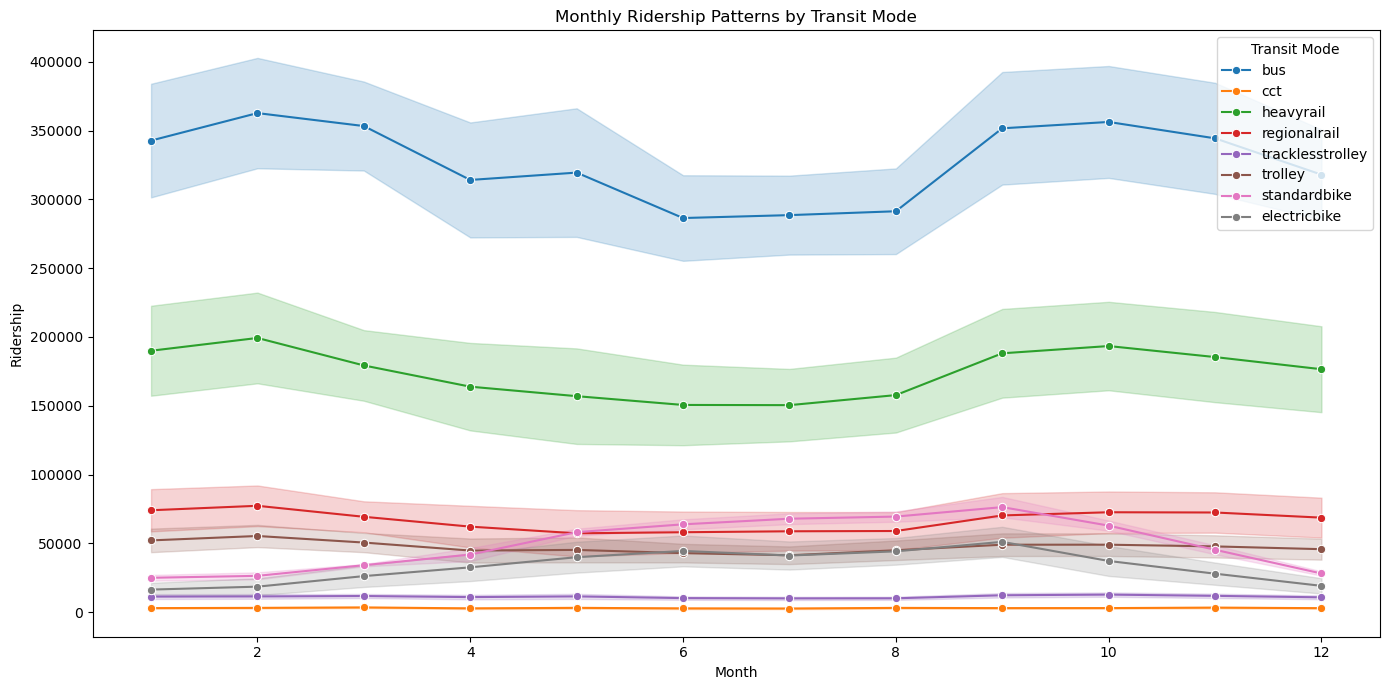

In [312]:
plt.figure(figsize=(14,7))
sb.lineplot(data=data, x='month', y='ridership', hue='trans_mode', marker='o', errorbar='se')
plt.title('Monthly Ridership Patterns by Transit Mode')
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.legend(title='Transit Mode')
plt.tight_layout()
plt.show()

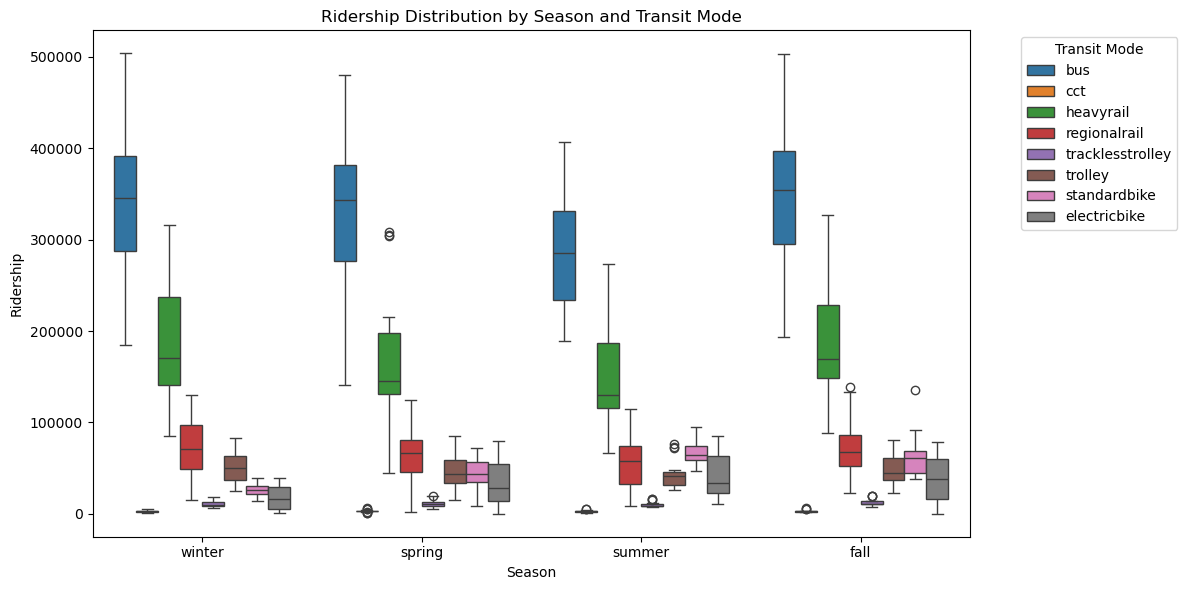

In [313]:
plt.figure(figsize=(12,6))
sb.boxplot(data=data, x='season', y='ridership', hue='trans_mode')
plt.title('Ridership Distribution by Season and Transit Mode')
plt.xlabel('Season')
plt.ylabel('Ridership')
plt.legend(title='Transit Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

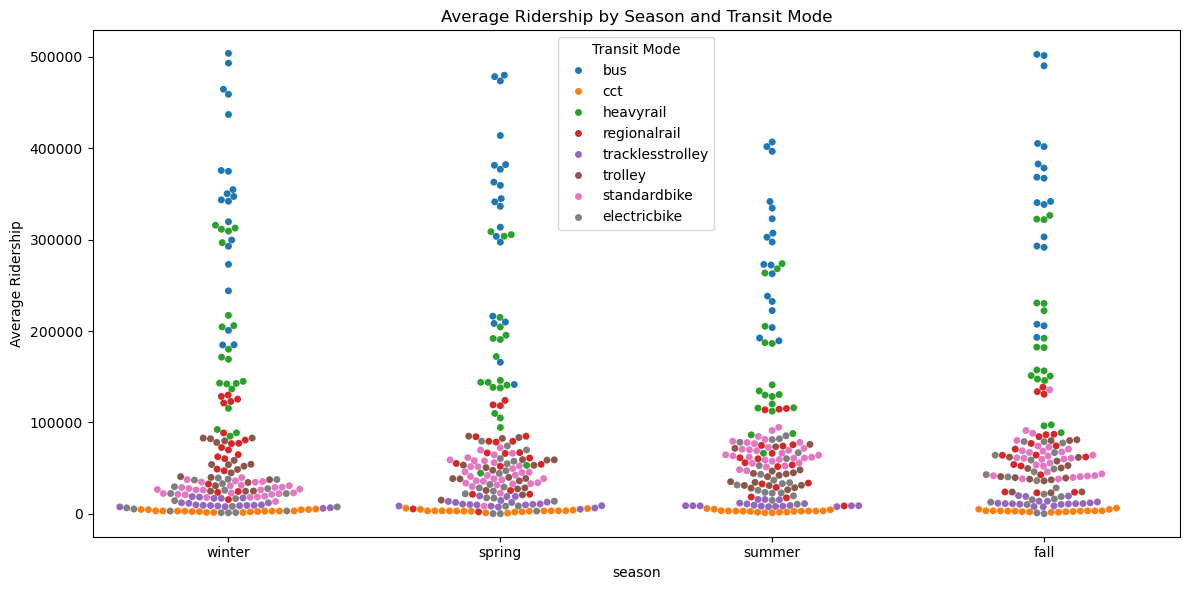

In [314]:
plt.figure(figsize=(12,6))
sb.swarmplot(data=data, x='season', y='ridership', hue='trans_mode')
plt.title('Average Ridership by Season and Transit Mode')
plt.ylabel('Average Ridership') 
plt.legend(title='Transit Mode')
plt.tight_layout()
plt.show()

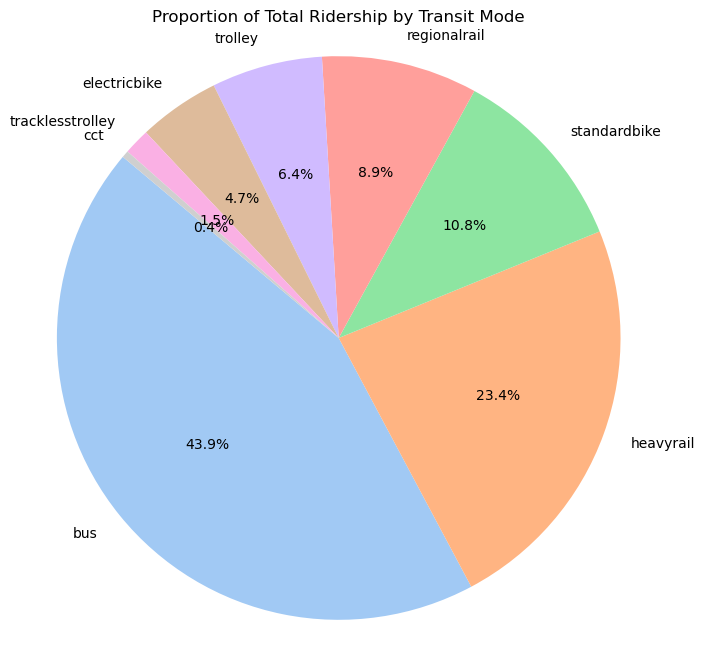

In [315]:
total_ridership_by_mode = data.groupby('trans_mode')['ridership'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,8))
plt.pie(total_ridership_by_mode, labels=total_ridership_by_mode.index, autopct='%1.1f%%', startangle=140, colors=sb.color_palette('pastel'))
plt.title('Proportion of Total Ridership by Transit Mode')
plt.axis('equal')
plt.show()

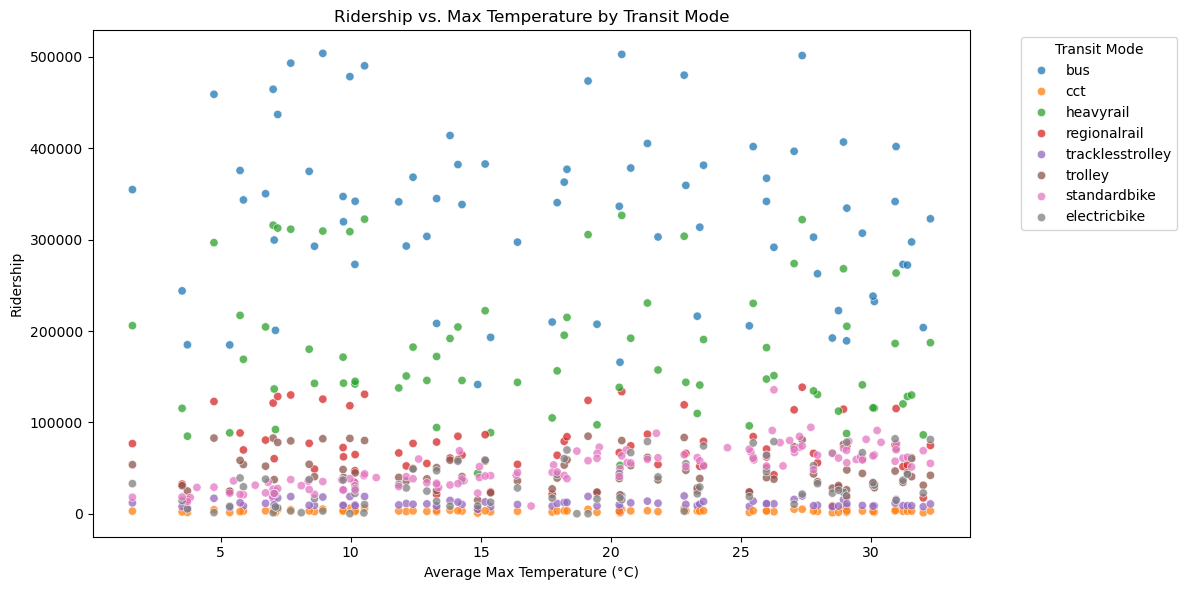

In [316]:
plt.figure(figsize=(12,6))
sb.scatterplot(data=data, x='avg_max_temp', y='ridership', hue='trans_mode', alpha=0.75)
plt.title('Ridership vs. Max Temperature by Transit Mode')
plt.xlabel('Average Max Temperature (°C)')
plt.ylabel('Ridership')
plt.legend(title='Transit Mode', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

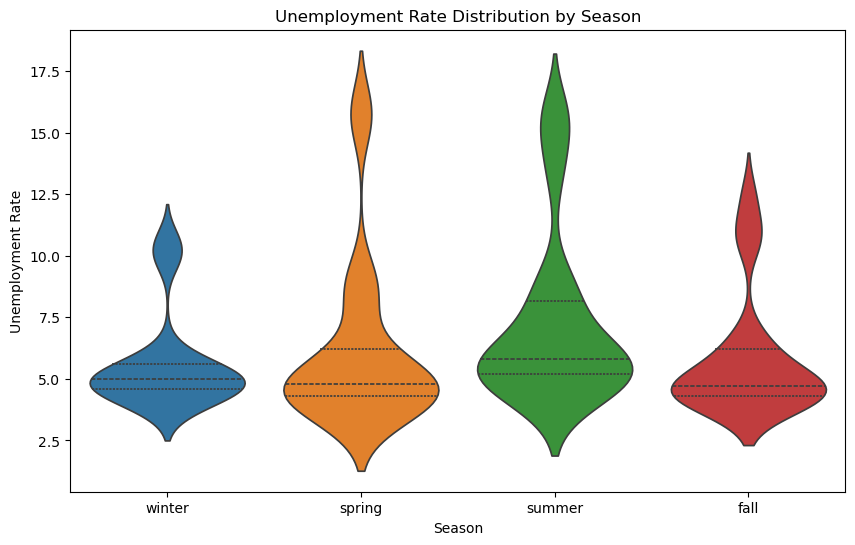

In [317]:
plt.figure(figsize=(10,6))
sb.violinplot(data=data, x='season', y='unemployment_rate', hue='season', inner='quart')
plt.title('Unemployment Rate Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Unemployment Rate')
plt.show()

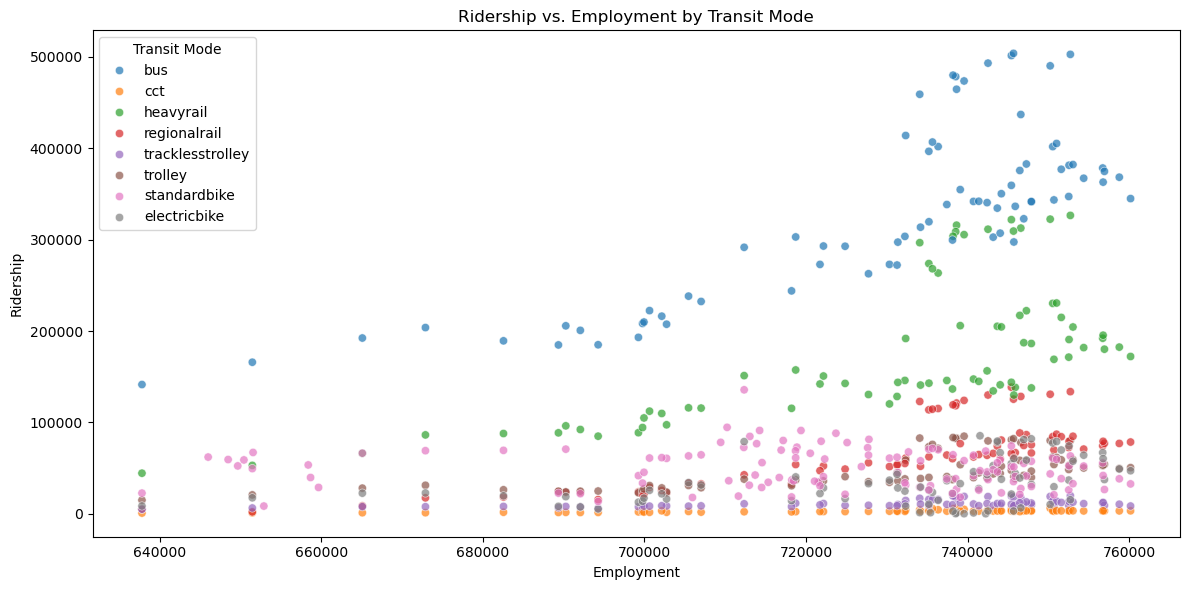

In [318]:
plt.figure(figsize=(12,6))
sb.scatterplot(data=data, x='employment', y='ridership', hue='trans_mode', alpha=0.7)
plt.title('Ridership vs. Employment by Transit Mode')
plt.xlabel('Employment')
plt.ylabel('Ridership')
plt.legend(title='Transit Mode')
plt.tight_layout()
plt.show()

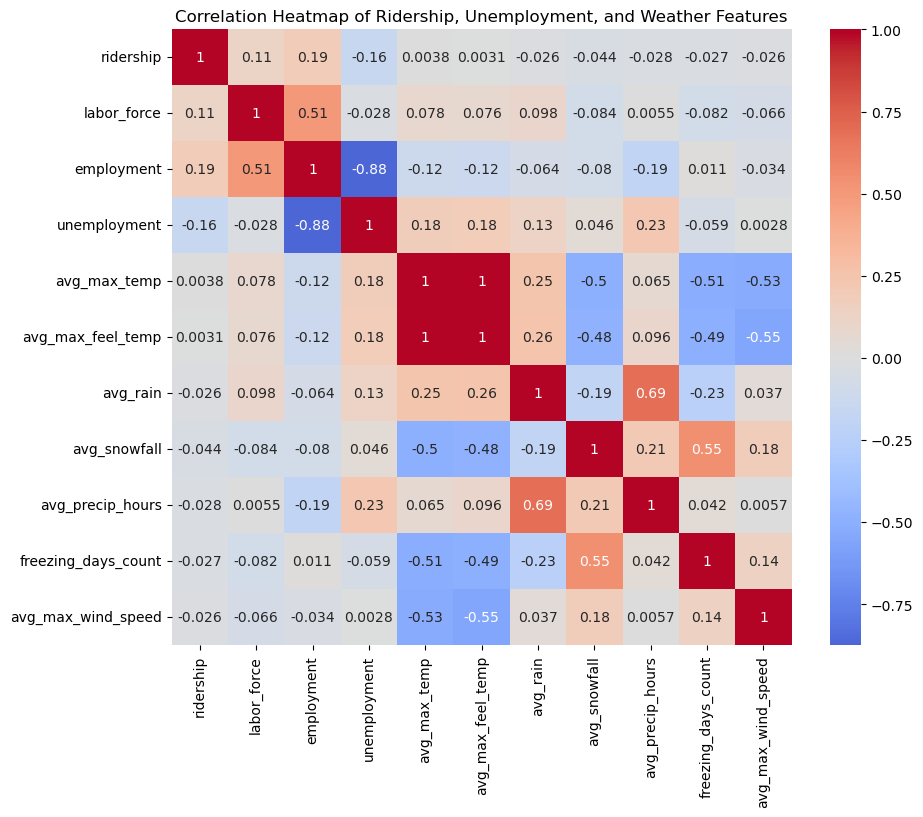

In [319]:
corr_features = [
    'ridership', 'labor_force', 'employment', 'unemployment', 
    'avg_max_temp', 'avg_max_feel_temp', 'avg_rain', 'avg_snowfall', 'avg_precip_hours', 'freezing_days_count', 'avg_max_wind_speed',
]

plt.figure(figsize=(10,8))
sb.heatmap(data[corr_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Ridership, Unemployment, and Weather Features')
plt.show()

### Paragraphs

#### Project Summary

Throughout this project, I learned a lot about various data preparation techniques, along with some data scraping methods. Notably, the data scraping needed for one of my data sources, my more-than-usual use of regex, and having to input all my data into a database through Python.

I used many of the standard data preparation techniques I've been using for previous semesters and throughout my undergrad. However, I learned much more about regex, data scraping, and data visualization. I've used regex before for cleaning data occasionally, but I used it quite a bit throughout this project due to the nature of my data sources. Since I used different sources, I ended up with various formats for the same thing, such as dates, which would cause problems with Pandas, so I'd have to edit the formatting manually using regex.

I did learn a lot about using databases with Python and had to refresh my SQL skills for this last milestone. I've used SQL and databases throughout entire classes as part of my undergraduate degree and have designed multiple databases. Still, it's really not something I do often, not even in Python. Due to this, I struggled a bit to get the results I wanted with my joins. After some research and messing with the SQL, I got a final data table that proved viable for my data visualizations. I then transformed the final merged table into a dataset and used that new dataset for the visualizations.

For data visualizations, I feel like I've been doing the same graphs over and over, which makes sense since I keep making them because they provide the information I need, so I decided to try out some different plots and try messing with the setting and exploring what data I could use that might show some interesting patterns so I ended doing a swarmplot and a violinplot along with my more typical plots like the heatmap and the line plots. 

As for data scraping, this is probably the second or third time using data scraping to obtain data as usually there's just a CSV file available but for this assignment that wasn't an option so I had to look through the page setup and make sure I was pulling the tables I actually wanted from the website which I found quite interesting. 

#### Ethical Implications

The majority of the changes I made to the data in this final milestone were changing the formatting of some columns so that when I put them into the database, they'd match the data found in other columns a bit better, so they're easier to join, for example, adding a season column to all the datasets. I think the significant change wasn't to the data but to the project itself. I ultimately decided to leave the bus dataset out of the final SQL database as it was inflating statistics for fall season since for some reason that dataset only came with information for the fall, so I opted to use the mode dataset to get ridership statistics of various transit methods throughout various seasons wtih the trade-off that the bus data went from spanning from fall 2015 to fall 2025 to all seasons 2019 to all seasons 2025, which I think was the right decision as we keep the data throught the year for various transit modes rather than the hyper-specific data for bus data for the fall seasons for the past 10 years.

I believe there are no regulatory or legal guidelines for my topic or data, since all my data was acquired from publicly available datasets and websites, and does not really include any specific data that might be able to be tracked down to specific individuals, as the data is pretty generalized.

I don't think any risks could come up with the transformations I've made to the data as most of it was cleaning up the formatting and making new columns out of the existing data, and given this data is publicly available, even if someone were to create some sort of misinformation with it, the original data would be available for verification.

I didn't make any assumptions while creating the data; all of the data is public data from public services, so there was really no need to make assumptions, since all the information I needed was already provided. I just had to clean it up and format it for my use.

All my data was sourced directly from their respective sources, so my SEPTA data was sourced directly from the SEPTA website, the Indego bike data was from Indego, and the Philadelphia unemployment data was sourced directly from the "US Bureau of Labor Statistics" website. Given that they come from the source of the data and relate to public services or information, the data is credible and usable since it's unlikely for these datasets to have been messed with too much.

My data was acquired ethically. I gathered all my datasets from the official websites of their sources, and they are all publicly available data, so there should be no ethical issues in how the data was acquired.

There was really no ethical implications so I don't really have much to mitigate other than I just made sure that I got my data from the official websites since it was all available there and there was no reason for me to source it from a third party.